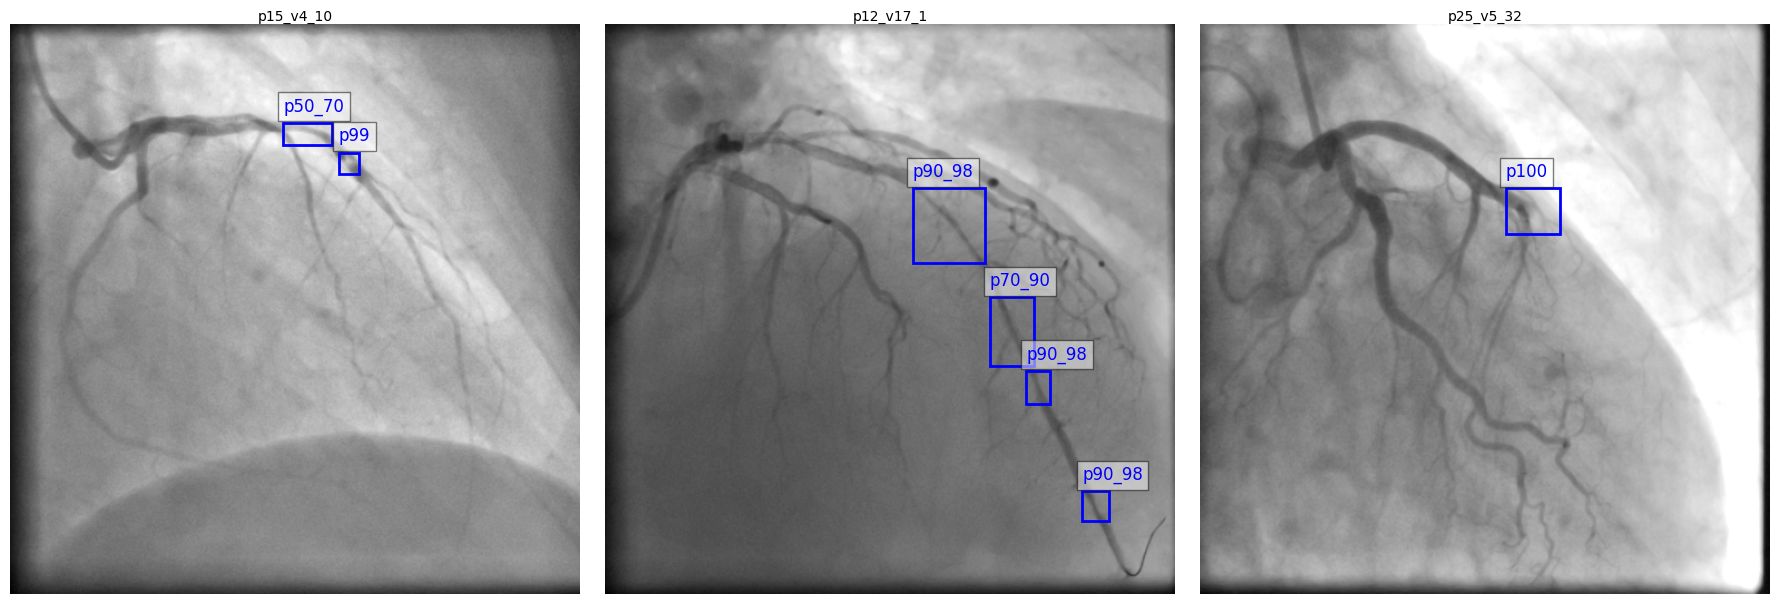

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes(df, patient_video_frame, ax=None):
    patient, video, frame = patient_video_frame.split("_")
    frame = int(frame)  

    row = df[(df['Patient'] == patient) & (df['Video'] == video) & (df['Frame'] == frame)]
    if row.empty:
        raise ValueError(f"No data found for input: {patient_video_frame}")

    image_path = row.iloc[0]['SelectedFramesLesionVideo']
    bbox_file_path = row.iloc[0]['GroundTruthFile']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # First 4 elements are [x, y, w, h]
        tag = parts[4]  # Last element is the lesion tag
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y -10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(f"{patient_video_frame}", fontsize=10, pad=-10)
    return ax

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")

inputs_1 = ["p1_v11_26", "p23_v1_15", "p23_v10_10"]
inputs = ["p15_v4_10", "p12_v17_1", "p25_v5_32"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, patient_video_frame in enumerate(inputs):
    visualize_bounding_boxes(data, patient_video_frame, ax=axes[i])

plt.tight_layout()
plt.savefig('show_images_2.png')
plt.show()


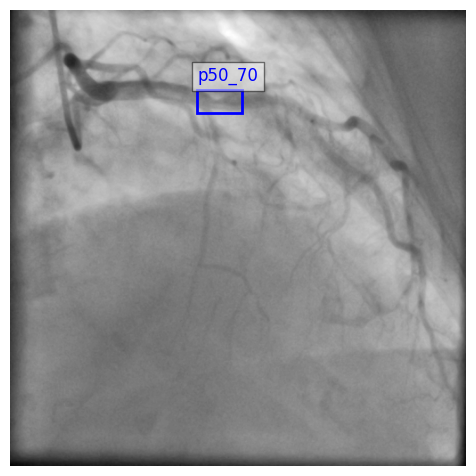

In [50]:
patient_video_frame = "p26_v2_28"

fig, axes = plt.subplots(1, 1, figsize=(5,5))

visualize_bounding_boxes(data, patient_video_frame, ax=axes)

plt.tight_layout()
plt.title("")
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/image_cadica_{patient_video_frame}.svg', bbox_inches='tight', pad_inches=0)
plt.show()


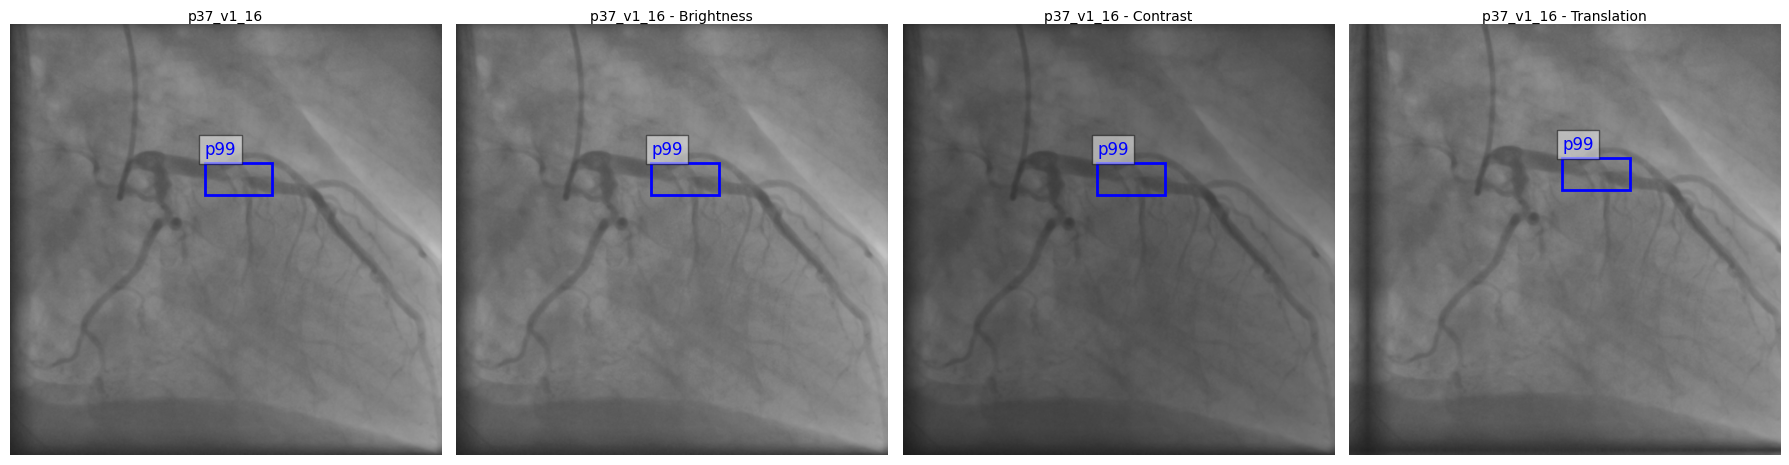

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes_new(df, frame_path, title=None, ax=None):
    """
    Visualize bounding boxes for a given frame using the new CSV structure.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'Frame_path' and 'Groundtruth_path'.
        frame_path (str): Path to the frame image.
        title (str): Custom title for the image.
        ax (plt.Axes): Matplotlib axes for the plot.
        
    Returns:
        plt.Axes: Axes with the bounding boxes drawn.
    """
    # Filter the row based on the frame path
    row = df[df['Frame_path'] == frame_path]
    if row.empty:
        raise ValueError(f"No data found for input: {frame_path}")

    image_path = row.iloc[0]['Frame_path']
    bbox_file_path = row.iloc[0]['Groundtruth_path']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # [x, y, w, h]
        tag = parts[4]  # Tag for the bounding box
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    # Draw bounding boxes
    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y - 10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Set the title
    title = title if title else os.path.basename(frame_path)
    ax.set_title(title, fontsize=10, pad=-10)
    return ax

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")
visualize_bounding_boxes(data, "p37_v1_16", ax=axes[0])

# Load the new CSV
data = pd.read_csv("/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/augmented_val.csv")

# Example inputs
inputs = [
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_brightness_2.png",
     "title": "p37_v1_16 - Brightness"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_contrast_1.png",
     "title": "p37_v1_16 - Contrast"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_translation_2.png",
     "title": "p37_v1_16 - Translation"}
]

for i, input_data in enumerate(inputs):
    frame_path = input_data["frame_path"]
    title = input_data["title"]
    visualize_bounding_boxes_new(data, frame_path, title=title, ax=axes[i+1])

plt.tight_layout()
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/augmentation.pdf', bbox_inches='tight', pad_inches=0)
plt.show()



['#000004', '#040314', '#0d0829', '#1b0c41', '#290b55', '#3b0964', '#4a0c6b', '#5a116e', '#69166e', '#781c6d', '#87216b', '#972766', '#a52c60', '#b43359', '#c13a50', '#cf4446', '#da4e3c', '#e55c30', '#ed6925', '#f47918', '#f8890c', '#fb9b06', '#fcac11', '#fac026', '#f7d13d', '#f3e55d', '#f2f482', '#fcffa4']


/tmp/ipykernel_30801/1545066709.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(palette_name, n_colors)


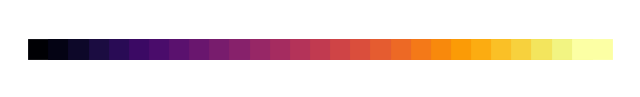

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

def extract_colors_from_palette_hex(palette_name: str, n_colors: int) -> list:
    """
    Extracts N different colors from a given matplotlib colormap and converts them to hexadecimal format.

    Args:
        palette_name (str): The name of the matplotlib colormap (e.g., 'jet', 'viridis').
        n_colors (int): The number of colors to extract.

    Returns:
        list: A list of hex color strings.
    """
    try:
        # Get the colormap from the name
        colormap = cm.get_cmap(palette_name, n_colors)
        
        # Extract colors by generating evenly spaced points in the colormap
        colors = [colormap(i / (n_colors - 1)) for i in range(n_colors)]
        
        # Convert RGBA colors to hex format
        hex_colors = [mcolors.to_hex(color) for color in colors]
        
        return hex_colors
    except ValueError:
        print(f"Error: Colormap '{palette_name}' not found.")
        return []

# Example usage
palette = "inferno"
n = 28
colors = extract_colors_from_palette_hex(palette, n)
print(colors)

# Visualize the extracted colors
plt.figure(figsize=(8, 1))
for i, color in enumerate(colors):
    plt.plot([i, i + 1], [1, 1], color=color, linewidth=15)
plt.axis("off")
plt.show()


## Dataset related...

In [13]:
import os
import pandas as pd
from collections import defaultdict

def count_lesions_in_splits(input_folder: str, output_csv: str) -> None:
    """
    Reads the train, val, and test CSV files from the input_folder, parses the
    'LesionLabel' column (which may contain multiple comma-separated labels),
    counts how many times each lesion label appears in each split, and saves
    a CSV table with columns: ['Lesion', 'Train', 'Val', 'Test'].

    Args:
        input_folder (str): Path to the folder containing 'train.csv',
                            'val.csv' and 'test.csv'.
        output_csv (str):   Path (including filename) for the output CSV file
                            that will store the aggregated lesion counts.
    """

    # Prepare dictionary to track lesion counts
    # The inner dictionary has 'Train', 'Val', 'Test' counters for each label
    counts_dict = defaultdict(lambda: {'Train': 0, 'Val': 0, 'Test': 0})

    # Read each of the three split CSV files
    train_path = os.path.join(input_folder, "train.csv")
    val_path = os.path.join(input_folder, "val.csv")
    test_path = os.path.join(input_folder, "test.csv")

    train_df = pd.read_csv(train_path)
    val_df = pd.read_csv(val_path)
    test_df = pd.read_csv(test_path)

    # Function to update counts based on a DataFrame and a split name
    def update_counts(dataframe, split_name):
        """
        For each row in the dataframe, split the 'LesionLabel' string by commas
        and increment the corresponding counter in counts_dict.
        """
        for _, row in dataframe.iterrows():
            labels = row['LesionLabel'].split(',')
            for lesion in labels:
                lesion = lesion.strip()  # Remove any extra whitespace
                counts_dict[lesion][split_name] += 1

    # Update counts using train/val/test DataFrames
    update_counts(train_df, 'Train')
    update_counts(val_df, 'Val')
    update_counts(test_df, 'Test')

    # Convert counts_dict to a DataFrame
    # Each key in counts_dict is a lesion, with a dict of counts for each split
    lesions = []
    train_counts = []
    val_counts = []
    test_counts = []

    for lesion_label, splits_dict in sorted(counts_dict.items()):
        lesions.append(lesion_label)
        train_counts.append(splits_dict['Train'])
        val_counts.append(splits_dict['Val'])
        test_counts.append(splits_dict['Test'])

    result_df = pd.DataFrame({
        'Lesion': lesions,
        'Train': train_counts,
        'Val': val_counts,
        'Test': test_counts
    })

    # Save result to CSV
    result_df.to_csv(output_csv, index=False)

import os
import pandas as pd

def extract_patients_from_splits(input_folder: str, output_csv: str) -> None:
    """
    Reads the train, val, and test CSV files from the input_folder, parses the
    'Frame_path' column to identify which patients are in each split (Train, Val, Test),
    and saves the result to output_csv.
    
    The resulting CSV will have two columns: ['Split', 'Patient'].
    Each row indicates that a particular patient is present in that split.
    
    Args:
        input_folder (str): Path to the folder containing 'train.csv', 'val.csv' and 'test.csv'.
        output_csv (str):   Path (including filename) for the output CSV file that will list
                            which patients appear in each split.
    """

    # File paths for the three splits
    train_path = os.path.join(input_folder, "train.csv")
    val_path = os.path.join(input_folder, "val.csv")
    test_path = os.path.join(input_folder, "test.csv")

    # Read the CSVs
    train_df = pd.read_csv(train_path)
    val_df = pd.read_csv(val_path)
    test_df = pd.read_csv(test_path)

    # Helper function to extract patient from a Frame_path
    # E.g.: /home/mario/.../p11_v22_00036.png -> patient = "p11"
    def get_patient(frame_path: str) -> str:
        filename = os.path.basename(frame_path)  # p11_v22_00036.png
        # Split by underscore -> ["p11", "v22", "00036.png"]
        return filename.split("_")[0]

    # For collecting (split, patient) pairs
    rows = []

    # Process train
    unique_train_patients = set()
    for path in train_df["Frame_path"].tolist():
        patient = get_patient(path)
        unique_train_patients.add(patient)
    for patient in sorted(unique_train_patients):
        rows.append({"Split": "Train", "Patient": patient})

    # Process val
    unique_val_patients = set()
    for path in val_df["Frame_path"].tolist():
        patient = get_patient(path)
        unique_val_patients.add(patient)
    for patient in sorted(unique_val_patients):
        rows.append({"Split": "Val", "Patient": patient})

    # Process test
    unique_test_patients = set()
    for path in test_df["Frame_path"].tolist():
        patient = get_patient(path)
        unique_test_patients.add(patient)
    for patient in sorted(unique_test_patients):
        rows.append({"Split": "Test", "Patient": patient})

    # Convert to DataFrame and save
    df_result = pd.DataFrame(rows, columns=["Split", "Patient"])
    df_result.to_csv(output_csv, index=False)

if __name__ == "__main__":
    count_lesions_in_splits("/home/mario/Python/Datasets/CADICA_Project/CADICA_Holdout_Info", 
                            "/home/mario/Python/Datasets/CADICA_Project/CADICA_Holdout_Info/lesion_counts.csv")
    extract_patients_from_splits("/home/mario/Python/Datasets/CADICA_Project/CADICA_Holdout_Info", 
                            "/home/mario/Python/Datasets/CADICA_Project/CADICA_Holdout_Info/patient_per_split.csv")


## Port simulated annealing results to standard

In [ ]:
import os
import pandas as pd
import yaml
from typing import List, Dict, Any

def compute_f1(precision: float, recall: float) -> float:
    """
    Computes the F1-score given precision and recall.

    Args:
        precision (float): Precision value.
        recall (float): Recall value.

    Returns:
        float: Computed F1-score.
    """
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def extract_highest_f1(results_csv_path: str):
    """
    Extracts the highest F1-score and its corresponding precision and recall from a results.csv file.

    Args:
        results_csv_path (str): Path to the results.csv file.

    Returns:
        tuple: Highest F1-score, corresponding precision, and recall.
    """
    try:
        df = pd.read_csv(results_csv_path)
        # Ensure the necessary columns are present
        if 'metrics/precision(B)' not in df.columns or 'metrics/recall(B)' not in df.columns:
            raise ValueError("Required columns 'metrics/precision(B)' or 'metrics/recall(B)' are missing in the CSV file.")
        
        # Compute F1-scores for each row
        df['f1_score'] = df.apply(lambda row: compute_f1(row['metrics/precision(B)'], row['metrics/recall(B)']), axis=1)
        
        # Identify the row with the highest F1-score
        max_f1_row = df.loc[df['f1_score'].idxmax()]
        
        # Extract the highest F1-score, and its corresponding precision and recall
        highest_f1 = max_f1_row['f1_score']
        corresponding_precision = max_f1_row['metrics/precision(B)']
        corresponding_recall = max_f1_row['metrics/recall(B)']
        
        return highest_f1, corresponding_precision, corresponding_recall
    except Exception as e:
        print(f"Error processing {results_csv_path}: {e}")
        return float('nan'), float('nan'), float('nan')

def extract_hyperparameters(args_yaml_path: str) -> Dict[str, Any]:
    """
    Extracts relevant hyperparameters from an args.yaml file.

    Args:
        args_yaml_path (str): Path to the args.yaml file.

    Returns:
        Dict[str, Any]: Dictionary of relevant hyperparameters.
    """
    relevant_keys = [
        'batch', 'box', 'cls', 'dfl', 'lr0', 'lrf', 'momentum', 'optimizer',
        'warmup_epochs', 'warmup_momentum', 'weight_decay'
    ]
    try:
        with open(args_yaml_path, 'r') as file:
            args = yaml.safe_load(file)
        return {f'params_{key}': args.get(key, float('nan')) for key in relevant_keys}
    except Exception as e:
        print(f"Error reading {args_yaml_path}: {e}")
        return {f'params_{key}': float('nan') for key in relevant_keys}

def consolidate_simulated_annealing_results(base_dir: str, output_csv_path: str):
    """
    Consolidates the results of simulated annealing trials into a CSV file.

    Args:
        base_dir (str): Base directory containing simulated annealing trial folders.
        output_csv_path (str): Path to save the consolidated CSV file.

    Returns:
        None
    """
    results = []

    for trial_folder in os.listdir(base_dir):
        trial_path = os.path.join(base_dir, trial_folder)

        if not os.path.isdir(trial_path):
            continue

        results_csv = os.path.join(trial_path, 'results.csv')
        args_yaml = os.path.join(trial_path, 'args.yaml')
        
        if os.path.exists(results_csv) and os.path.exists(args_yaml):
            trial_number = ''.join(filter(str.isdigit, trial_folder))  # Extract trial number
            max_f1, corresponding_precision, corresponding_recall = extract_highest_f1(results_csv)
            hyperparameters = extract_hyperparameters(args_yaml)

            df_results = pd.read_csv(results_csv)

            # Add placeholders for other required columns
            record = {
                'number': trial_number,
                'value': max_f1,
                'state': 'completed',
                'user_attrs_sampler': 'simulated_annealing',
                'user_attrs_seed': hyperparameters.get('params_seed', float('nan')),
                'user_attrs_batch_size': hyperparameters.get('params_batch', float('nan')),
                'user_attrs_execution_time': float('nan'),
                'user_attrs_f1_score': max_f1,
                'user_attrs_gpu_id': float('nan'),
                'user_attrs_last_epoch': df_results["epoch"].max(),
                'user_attrs_mAP50': df_results["metrics/mAP50(B)"].max(),
                'user_attrs_mAP50-95': df_results["metrics/mAP50-95(B)"].max(),
                'user_attrs_memory_allocated_after': float('nan'),
                'user_attrs_memory_allocated_before': float('nan'),
                'user_attrs_memory_reserved_after': float('nan'),
                'user_attrs_memory_reserved_before': float('nan'),
                'user_attrs_precision': corresponding_precision,
                'user_attrs_recall': corresponding_recall,
                **hyperparameters
            }

            results.append(record)

    # Create DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv_path, index=False)
    print(f"Consolidated results saved to {output_csv_path}")


# Example Usage
base_directory = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect"
output_csv = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/hyperparameter_optimization_results.csv"
consolidate_simulated_annealing_results(base_directory, output_csv)


/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing175
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing46
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing124
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing138
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing114
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing197
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing179
/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/SIMULATED_ANNEALING/detect/simulated_annealing9
/ho

In [4]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'ieee', 'std-colors'])
plt.rcParams['font.size'] = 12
plt.rcParams.update({'figure.dpi': '300'})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Plots

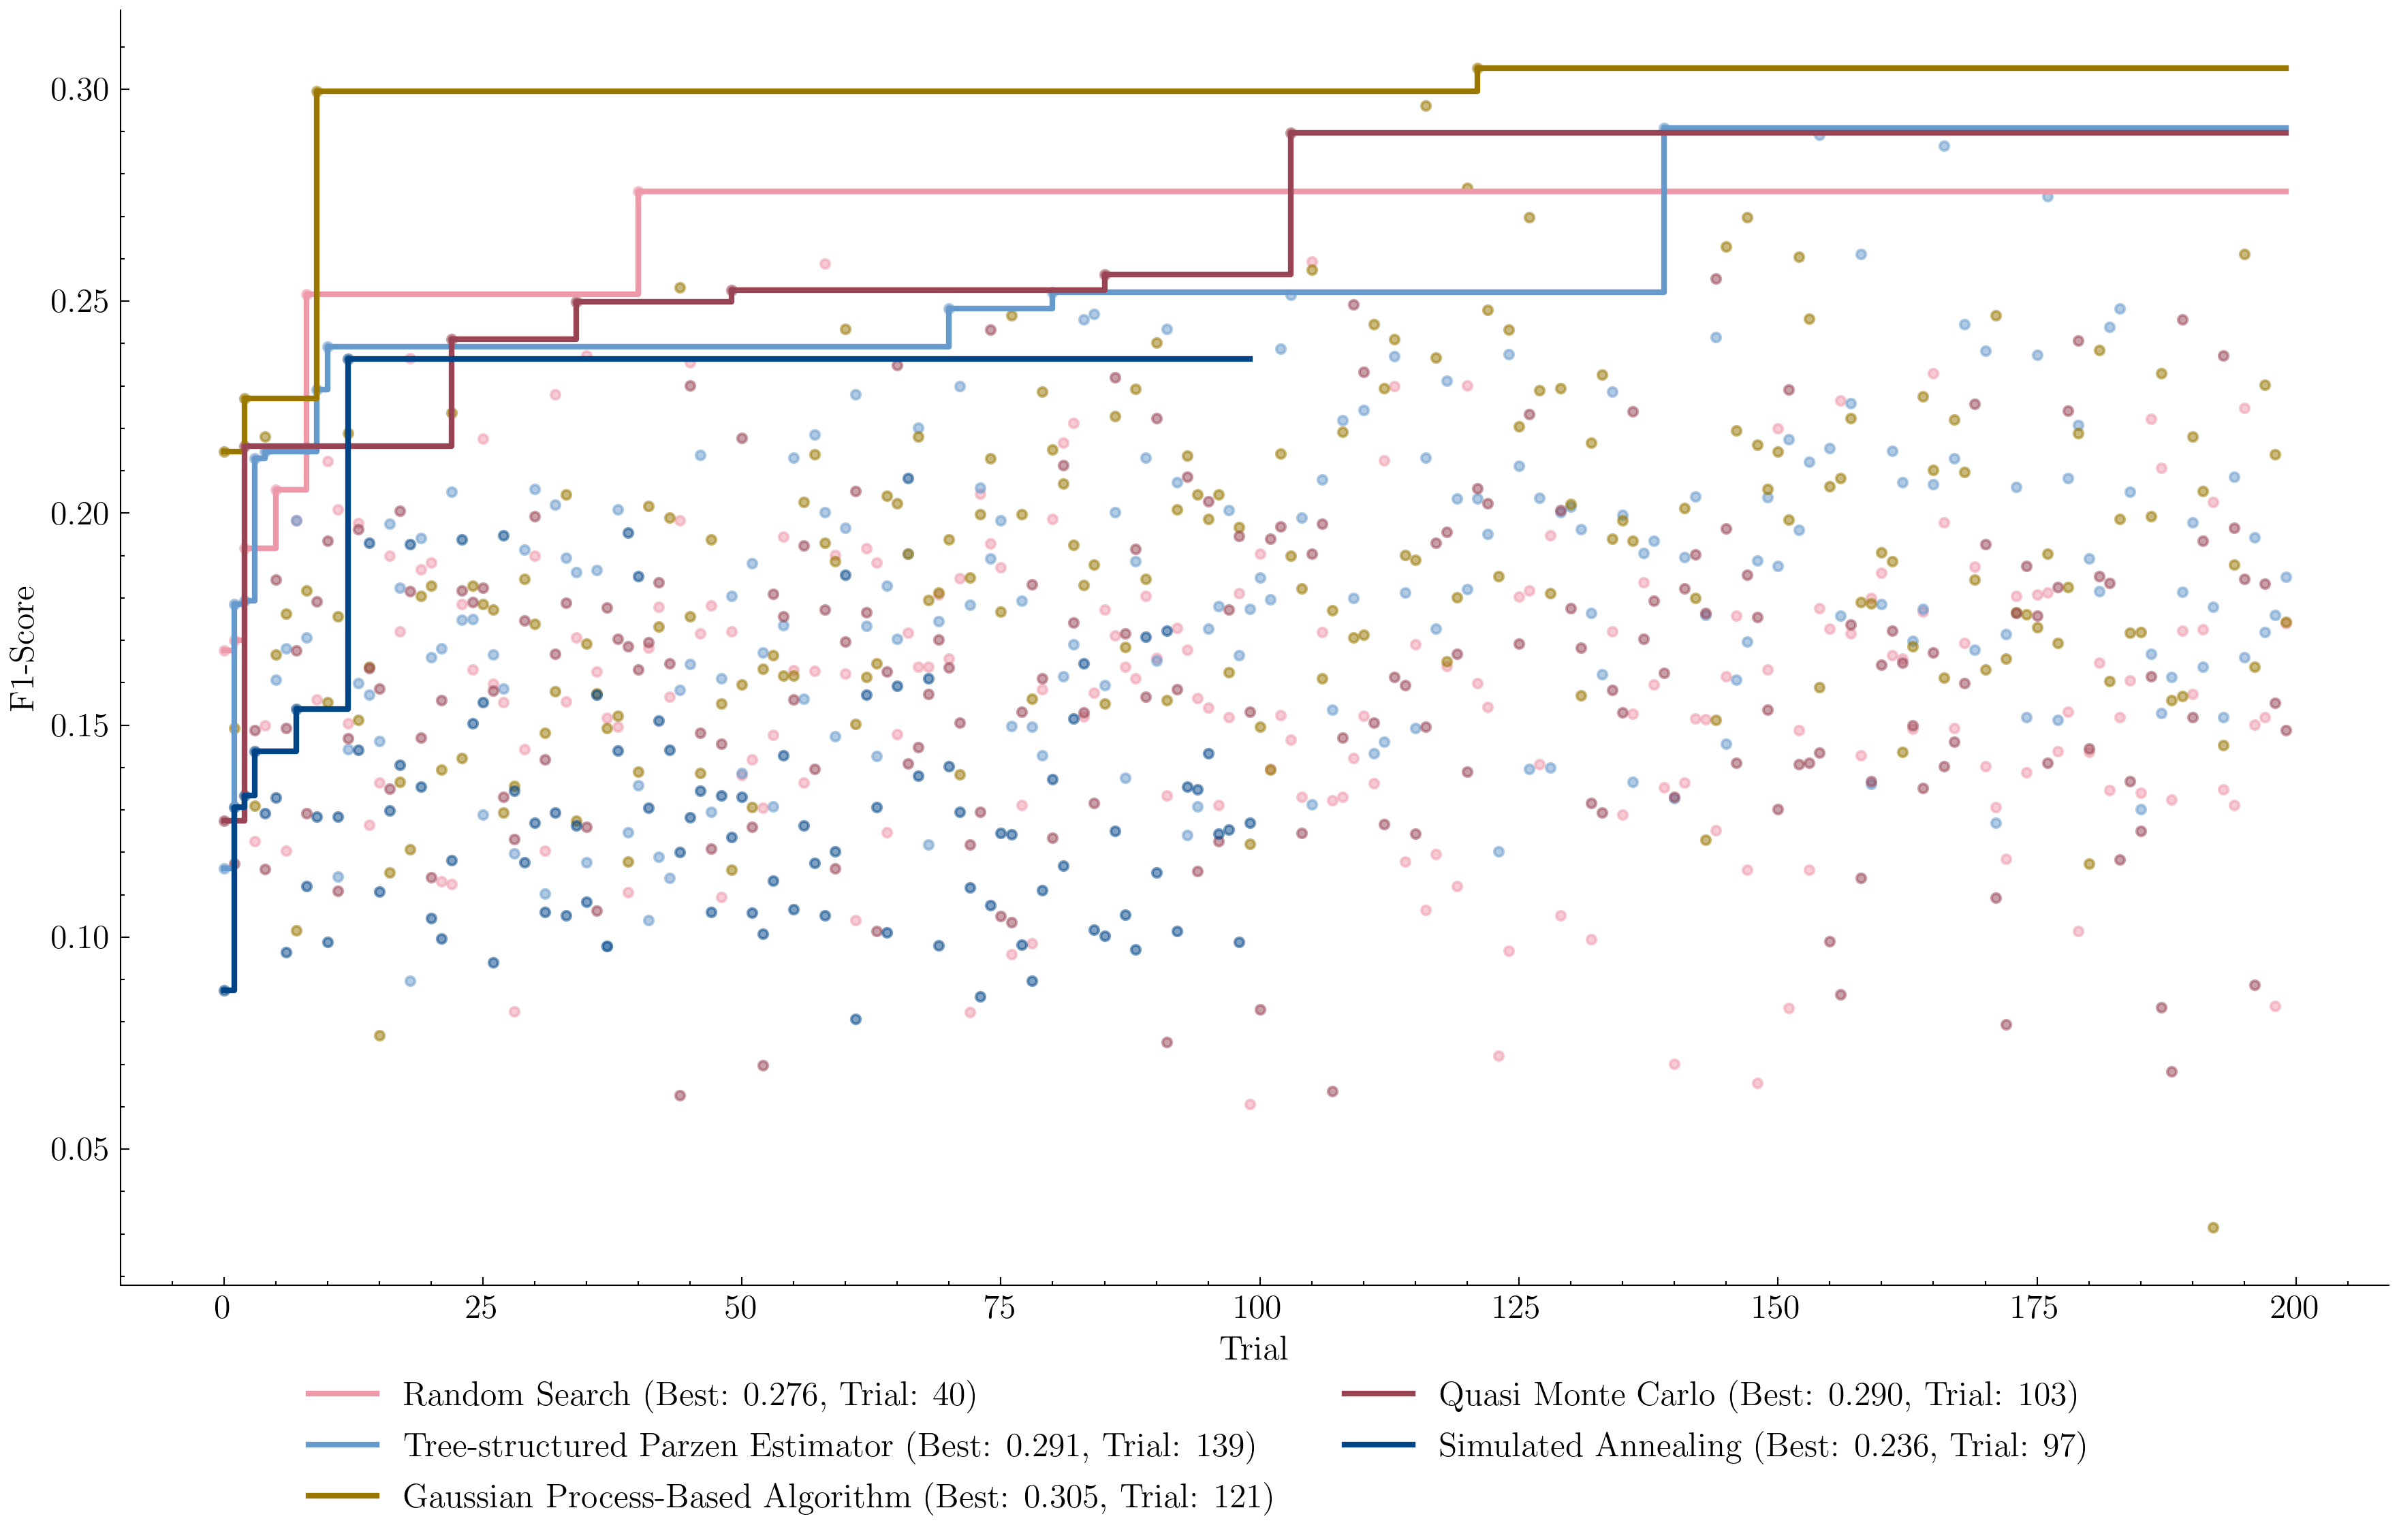

In [30]:

def plot_hyperparameter_results(
    sampler_csv_paths: Dict[str, Dict[str, str]], 
    output_path: str, 
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "objective_0"},
    whiskers: bool = False
):
    """
    Generate a single visualization of a chosen metric per trial for hyperparameter optimization samplers.
    Adds whiskers to optimal trials based on F1-Score per epoch computed from results.csv files.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Color to plot for the sampler.
            - "results_root_folder": Path to the root folder containing results for optimal trials.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value to plot on Y-axis.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # Helper function to calculate the optimal front
    def calculate_optimal_front(trials: List[int], scores: List[float]):
        frontier_x, frontier_y = [], []
        best_so_far = -float("inf")
        for trial, score in zip(trials, scores):
            if score > best_so_far:
                if frontier_x:
                    frontier_x.append(trial)
                    frontier_y.append(best_so_far)  # Horizontal line
                best_so_far = score
                frontier_x.append(trial)
                frontier_y.append(score)  # Vertical line
        if trials[-1] != frontier_x[-1]:
            frontier_x.append(trials[-1])  # Extend horizontally to the last trial
            frontier_y.append(best_so_far)
        return frontier_x, frontier_y

    # Helper function to calculate F1-Score for a trial
    def compute_f1_score(results_file: str):
        df = pd.read_csv(results_file)
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
        return f1_score

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 7))
    
    legends = []

    # Plot each sampler
    for sampler_name, sampler_data in sampler_csv_paths.items():
        df = pd.read_csv(sampler_data["path"])
        trials = df.index.values
        scores = df[metric_col]
        
        # Calculate optimal front
        frontier_x, frontier_y = calculate_optimal_front(trials, scores)
        
        # Plot all trials
        ax.scatter(trials, scores, s=10, color=sampler_data["color"], alpha=0.5, label=sampler_name)
        
        # Plot optimal frontier
        ax.step(frontier_x, frontier_y, where='post', color=sampler_data["color"], linewidth=2)
        
        # Add whiskers for optimal trials
        if whiskers:
            optimal_trials = [trial for trial, _ in zip(frontier_x[::2], frontier_y[::2])]
            for trial, mean_f1 in zip(optimal_trials, frontier_y[::2]):
                if sampler_name != "Simulated Annealing":
                    results_file = os.path.join(sampler_data["results_root_folder"], f"trial_{trial}_training", "results.csv")
                else:
                    results_file = os.path.join(sampler_data["results_root_folder"], f"simulated_annealing{trial}", "results.csv")
                if os.path.exists(results_file):
                    f1_scores = compute_f1_score(results_file)
                    min_f1, max_f1 = f1_scores.min(), f1_scores.max()
                    lower_err = max(0, mean_f1 - min_f1)
                    upper_err = max(0, max_f1 - mean_f1)
                    ax.errorbar(trial, mean_f1,
                                yerr=[[lower_err], [upper_err]],
                                fmt="o", color=sampler_data["color"], capsize=3, alpha=0.7)

        # Update legends
        best_idx = df[metric_col].idxmax()
        best_trial = df.loc[best_idx, "number"]
        best_score = df.loc[best_idx, metric_col]
        legends.append((plt.Line2D([], [], color=sampler_data["color"], linewidth=2),
                        f"{sampler_name} (Best: {best_score:.3f}, Trial: {int(best_trial)})"))

    # Add labels and titles
    ax.set_xlabel("Trial")
    ax.set_ylabel(metric_name)

    for ax in [ax]:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    # Unified legend
    handles, labels = zip(*legends)
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # Save and show the figure
    plt.tight_layout()
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()


# Example Usage
sampler_paths = {
    "Random Search": {"path": os.path.join(base_path, "RANDOM", base_name),
                "color": colors.get("RANDOM"), "results_root_folder": os.path.join(base_path, "RANDOM", "detect")},
    "Tree-structured Parzen Estimator": {"path": os.path.join(base_path, "TPE", base_name),
            "color": colors.get("TPE"), "results_root_folder": os.path.join(base_path, "TPE", "detect")},
    "Gaussian Process-Based Algorithm": {"path": os.path.join(base_path, "GPSAMPLER", base_name),
            "color": colors.get("GPSAMPLER"), "results_root_folder": os.path.join(base_path, "GPSAMPLER", "detect")},
    "Quasi Monte Carlo": {"path": os.path.join(base_path, "QMCSAMPLER", base_name),
            "color": colors.get("QMCSAMPLER"), "results_root_folder": os.path.join(base_path, "QMCSAMPLER", "detect")},
    "Simulated Annealing": {"path": os.path.join(base_path, "SIMULATED_ANNEALING", base_name),
            "color": colors.get("SIMULATED_ANNEALING"), "results_root_folder": os.path.join(base_path, "SIMULATED_ANNEALING", "detect")},
}
plot_hyperparameter_results(sampler_paths, output_path=os.path.join(save_plots_path, "performance_per_trial"), output_format="pdf", metric_column={"F1-Score": "user_attrs_f1_score"})


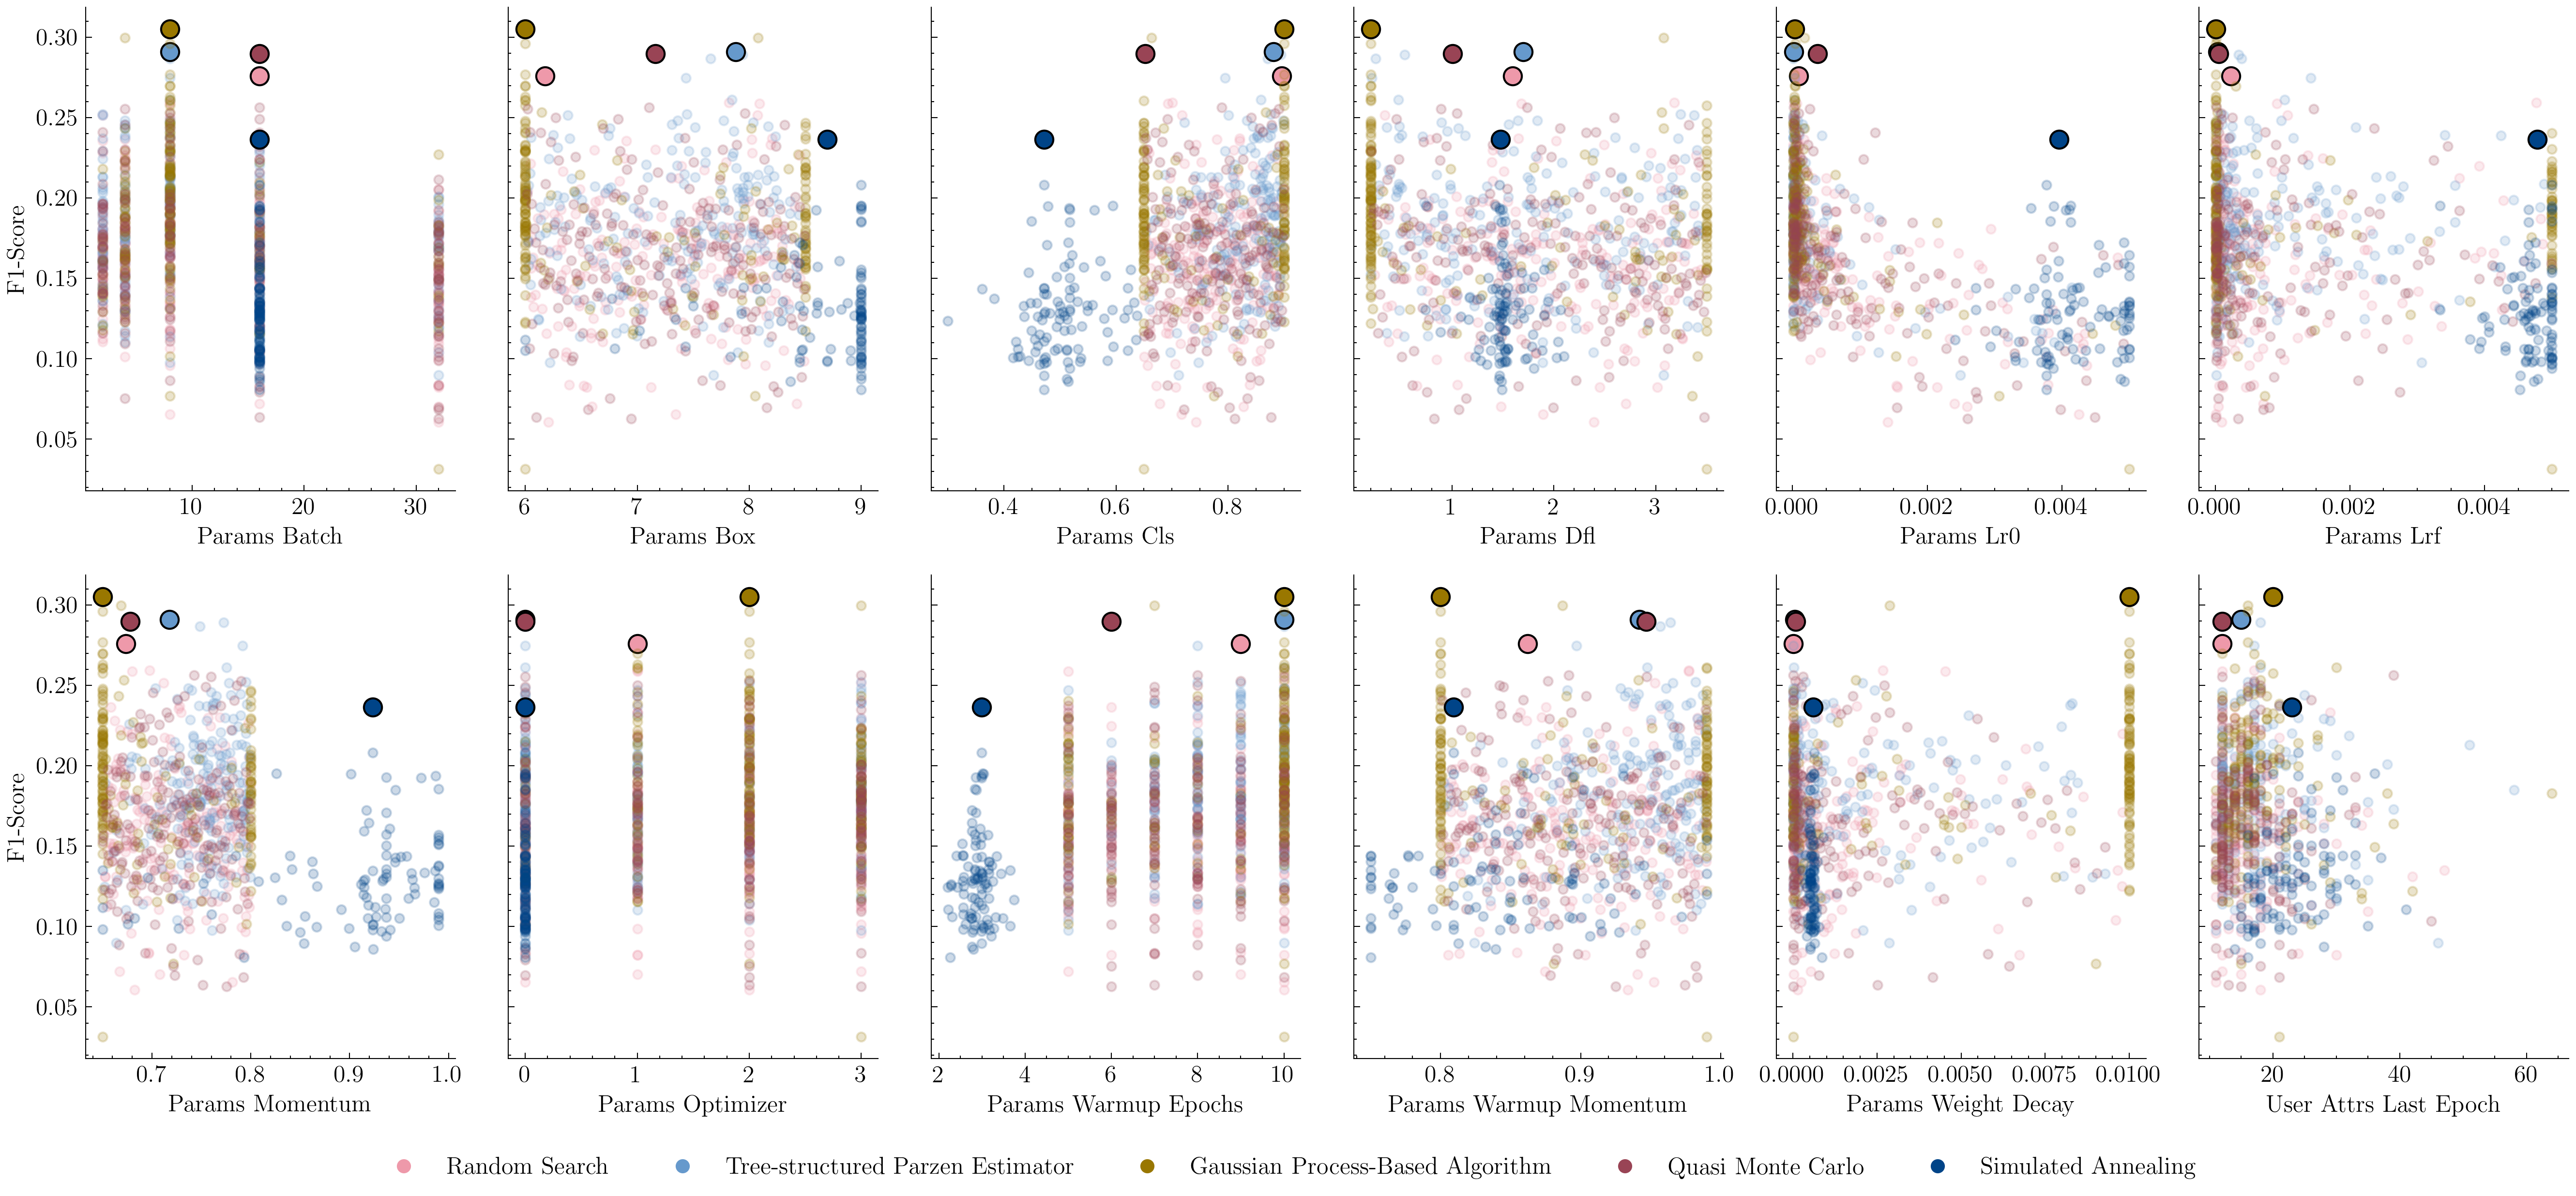

In [29]:
def plot_hyperparameter_scatter(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "user_attrs_f1_score"}
):
    """
    Generate scatterplots for hyperparameters with performance metric as Y-axis, highlighting the best hyperparameter values
    for each sampler.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Color to plot for the sampler.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value for the metric.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # List of hyperparameters to plot
    hyperparameters = [
        "params_batch", "params_box", "params_cls", "params_dfl", "params_lr0",
        "params_lrf", "params_momentum", "params_optimizer", "params_warmup_epochs",
        "params_warmup_momentum", "params_weight_decay", "user_attrs_last_epoch"
    ]

    # Prepare the figure with 2 rows x 6 columns subplots
    fig, axes = plt.subplots(2, 6, figsize=(18, 8), sharey=True)
    axes = axes.ravel()  # Flatten axes for easy indexing

    # Process each hyperparameter
    for idx, hyperparameter in enumerate(hyperparameters):
        ax = axes[idx]
        
        # Process each sampler and plot data
        for sampler_name, sampler_data in sampler_csv_paths.items():
            # Load data
            df = pd.read_csv(sampler_data["path"])
            if hyperparameter not in df.columns or metric_col not in df.columns:
                continue
            
            # Encode categorical variables (e.g., params_optimizer)
            if hyperparameter == "params_optimizer":
                label_encoder = LabelEncoder()
                df[hyperparameter] = label_encoder.fit_transform(df[hyperparameter].astype(str))
            
            # Identify the best point for the given sampler based on the metric
            best_idx = df[metric_col].idxmax()
            best_value = df.loc[best_idx, hyperparameter]
            best_score = df.loc[best_idx, metric_col]
            
            # Scatter plot with all points and highlight the best
            scatter = ax.scatter(
                df[hyperparameter], df[metric_col], color=sampler_data["color"], alpha=0.2, s=20, label=sampler_name if idx == 0 else ""
            )
            ax.scatter(
                best_value, best_score, color=sampler_data["color"], alpha=1.0, edgecolor='black', s=80
            )
            ax.plot([], [], 'o', color=sampler_data["color"], label=sampler_name)  # Dummy plot for legend
        
        # Add titles and labels
        # ax.set_title(hyperparameter.replace("_", " ").title())
        ax.set_xlabel(hyperparameter.replace("_", " ").title())
        if idx % 6 == 0:
            ax.set_ylabel(metric_name)

    for ax in axes:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    # Unified legend
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
    fig.legend(by_label.values(), by_label.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(sampler_csv_paths))

    # Adjust layout
    plt.tight_layout()
    #plt.subplots_adjust(bottom=0.1)

    # Save the figure
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()

# Example Usage
sampler_paths = {
    "Random Search": {"path": os.path.join(base_path, "RANDOM", base_name),
                "color": colors.get("RANDOM"), "results_root_folder": os.path.join(base_path, "RANDOM", "detect")},
    "Tree-structured Parzen Estimator": {"path": os.path.join(base_path, "TPE", base_name),
            "color": colors.get("TPE"), "results_root_folder": os.path.join(base_path, "TPE", "detect")},
    "Gaussian Process-Based Algorithm": {"path": os.path.join(base_path, "GPSAMPLER", base_name),
            "color": colors.get("GPSAMPLER"), "results_root_folder": os.path.join(base_path, "GPSAMPLER", "detect")},
    "Quasi Monte Carlo": {"path": os.path.join(base_path, "QMCSAMPLER", base_name),
            "color": colors.get("QMCSAMPLER"), "results_root_folder": os.path.join(base_path, "QMCSAMPLER", "detect")},
    "Simulated Annealing": {"path": os.path.join(base_path, "SIMULATED_ANNEALING", base_name),
            "color": colors.get("SIMULATED_ANNEALING"), "results_root_folder": os.path.join(base_path, "SIMULATED_ANNEALING", "detect")},
}
plot_hyperparameter_scatter(sampler_paths, output_path=os.path.join(save_plots_path, "hyperparameter_scatterplots"), output_format="pdf", metric_column={"F1-Score": "user_attrs_f1_score"})


FileNotFoundError: [Errno 2] No such file or directory: '/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/RandomSamplerBaseline/detect/trial_22_training/results.csv'

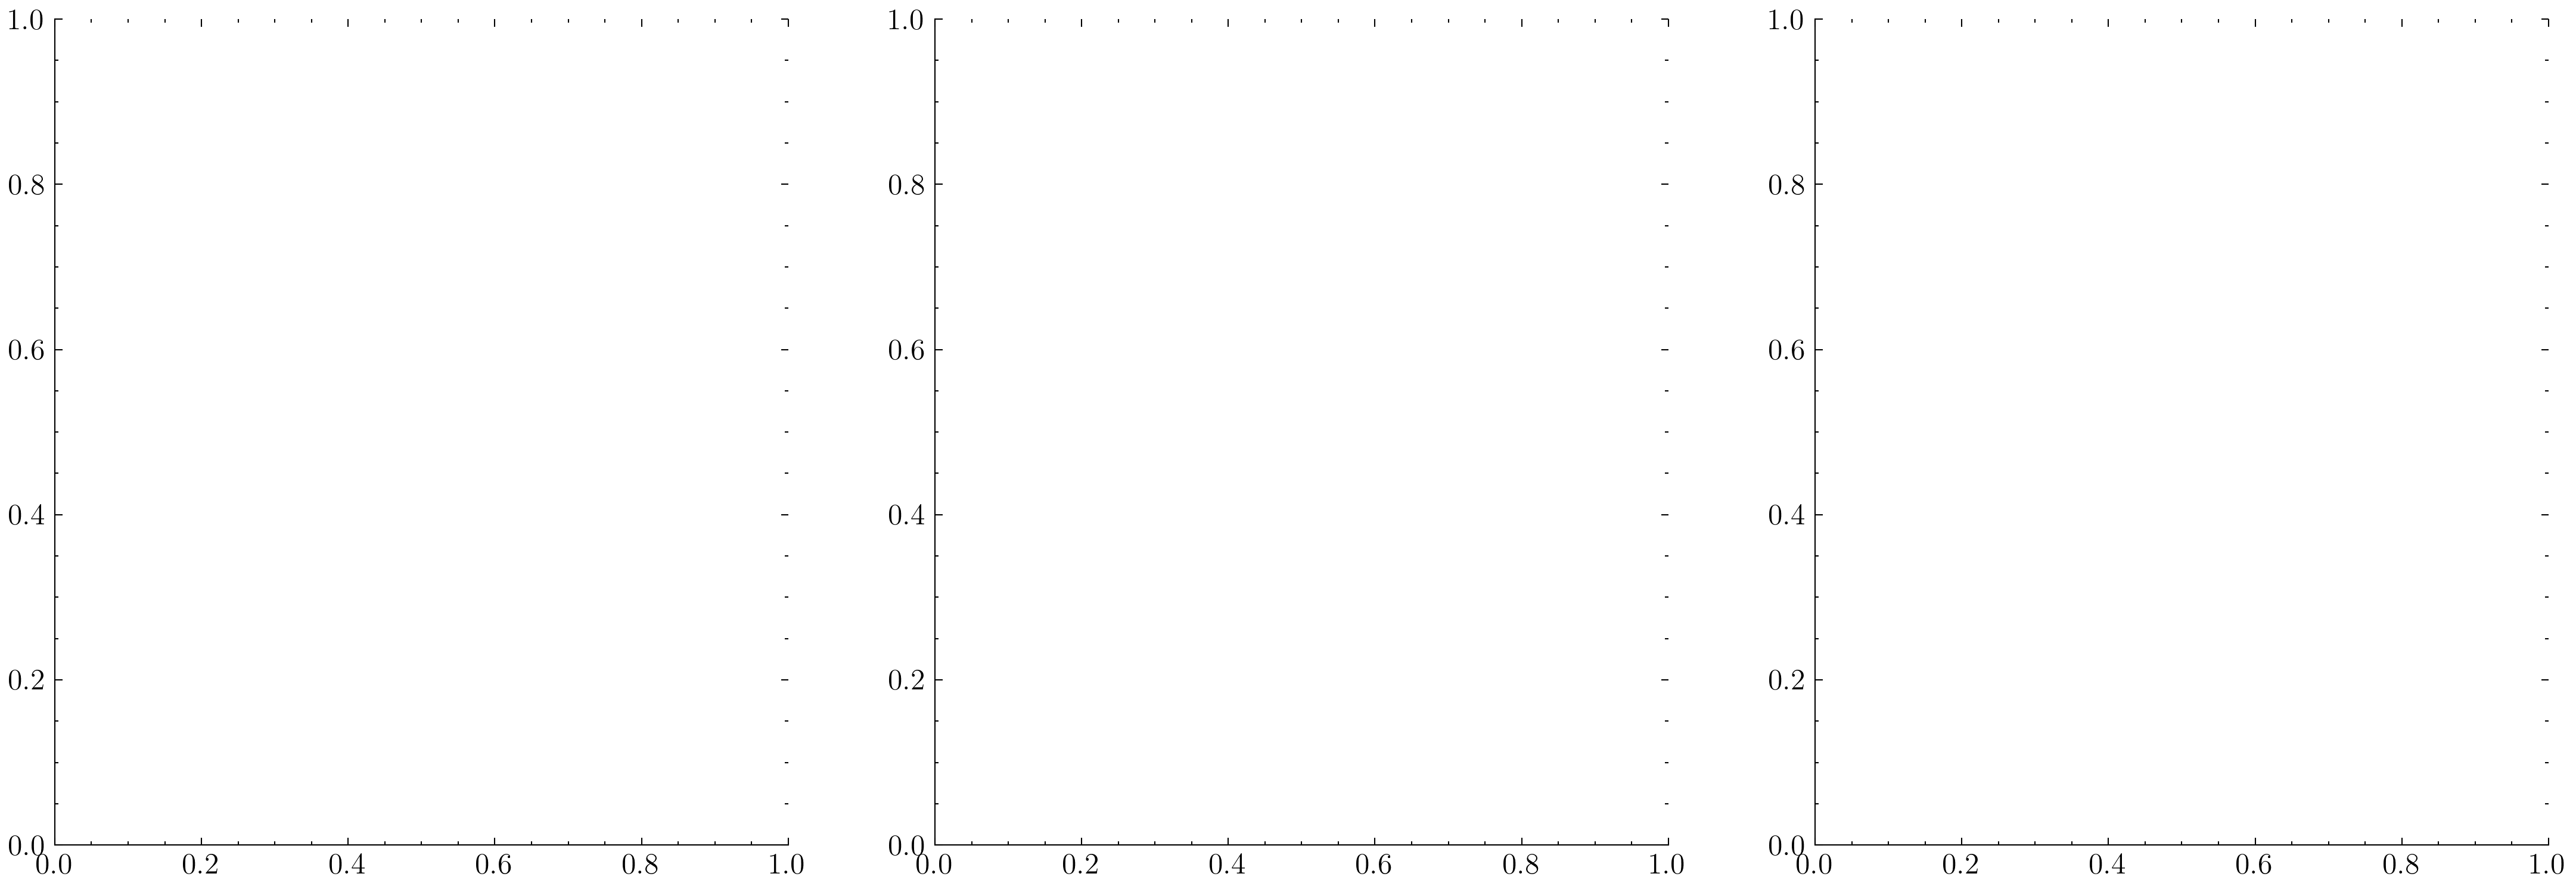

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from scipy.ndimage import gaussian_filter1d

def plot_training_comparison(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png"
):
    """
    Compare the training performance of baseline and optimized YOLO models by computing F1-Score per epoch,
    alongside train/val box loss and dfl loss plots.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file for training results.
            - "color": Color for the data series.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
    """
    # Initialize the figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    f1_ax, box_loss_ax, dfl_loss_ax = axes

    # Plot each sampler's training data, including Baseline
    for sampler_name, sampler_data in sampler_csv_paths.items():
        df = pd.read_csv(sampler_data["path"])
        if "epoch" not in df.columns or "metrics/precision(B)" not in df.columns or "metrics/recall(B)" not in df.columns:
            continue
        
        # Compute F1-Score per epoch
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
        smoothed_f1 = gaussian_filter1d(f1_score, sigma=1)
        
        # Subplot 1: F1-Score
        f1_ax.plot(df["epoch"], smoothed_f1, color=sampler_data["color"], linewidth=2, label=sampler_name.upper())

        # Subplot 2: train/box_loss vs val/box_loss
        if "train/box_loss" in df.columns and "val/box_loss" in df.columns:
            box_loss_ax.plot(df["epoch"], df["train/box_loss"], color=sampler_data["color"], linestyle="--", linewidth=2, label=f"Train Loss (linestyle)")
            box_loss_ax.plot(df["epoch"], df["val/box_loss"], color=sampler_data["color"], linestyle=":", linewidth=2, label=f"Val Loss (linestyle)")
        
        # Subplot 3: train/dfl_loss vs val/dfl_loss
        if "train/dfl_loss" in df.columns and "val/dfl_loss" in df.columns:
            dfl_loss_ax.plot(df["epoch"], df["train/dfl_loss"], color=sampler_data["color"], linestyle="--", linewidth=2, label=f"Train Loss (linestyle)")
            dfl_loss_ax.plot(df["epoch"], df["val/dfl_loss"], color=sampler_data["color"], linestyle=":", linewidth=2, label=f"Val Loss (linestyle)")

    # Subplot 1: F1-Score formatting
    f1_ax.set_title("Performance Comparison")
    f1_ax.set_xlabel("Epoch")
    f1_ax.set_ylabel("F1-Score")
    
    # Subplot 2: Box Loss formatting
    box_loss_ax.set_title("Box Loss")
    box_loss_ax.set_xlabel("Epoch")
    box_loss_ax.set_ylabel("Loss")
    
    # Subplot 3: DFL Loss formatting
    dfl_loss_ax.set_title("DFL Loss")
    dfl_loss_ax.set_xlabel("Epoch")
    dfl_loss_ax.set_ylabel("Loss")
    
    idx = 0
    for ax in axes:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        
        if idx == 0: text = "a."
        elif idx == 1: text = "b."
        else: text = "c."
        
        ax.text(-0.05, 1.05, text, transform=ax.transAxes, fontsize=12, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
        idx += 1

    # Unified legend (remove duplicates)
    handles, labels = [], []
    for ax in [f1_ax, box_loss_ax, dfl_loss_ax]:
        h, l = ax.get_legend_handles_labels()
        handles += h
        labels += l
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches='tight')
    plt.show()


# Example Usage
results_csv_paths = {
    "RANDOM": {"path": os.path.join(base_path, "RandomSamplerBaseline", "detect", "trial_22_training", "results.csv"), "color": colors.get("RANDOM")},
    "CMAES": {"path": os.path.join(base_path, "CMAES", "detect", "trial_131_training", "results.csv"), "color": colors.get("CMAES")},
    "TPE": {"path": os.path.join(base_path, "TPE", "detect", "trial_121_training", "results.csv"), "color": colors.get("TPE")},
    "SIMULATED ANNEALING": {"path": os.path.join(base_path, "SIMULATED_ANNEALING", "detect", "simulated_annealing97", "results.csv"), "color": colors.get("SIMULATED")},
    "BASELINE": {"path": os.path.join(base_path, "Baseline", "results.csv"), "color": colors.get("BASELINE")},
}

plot_training_comparison(
    sampler_csv_paths=results_csv_paths,
    output_path=os.path.join(save_plots_path, "training_comparison"),
    output_format="pdf",
)



/tmp/ipykernel_7633/4255711638.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


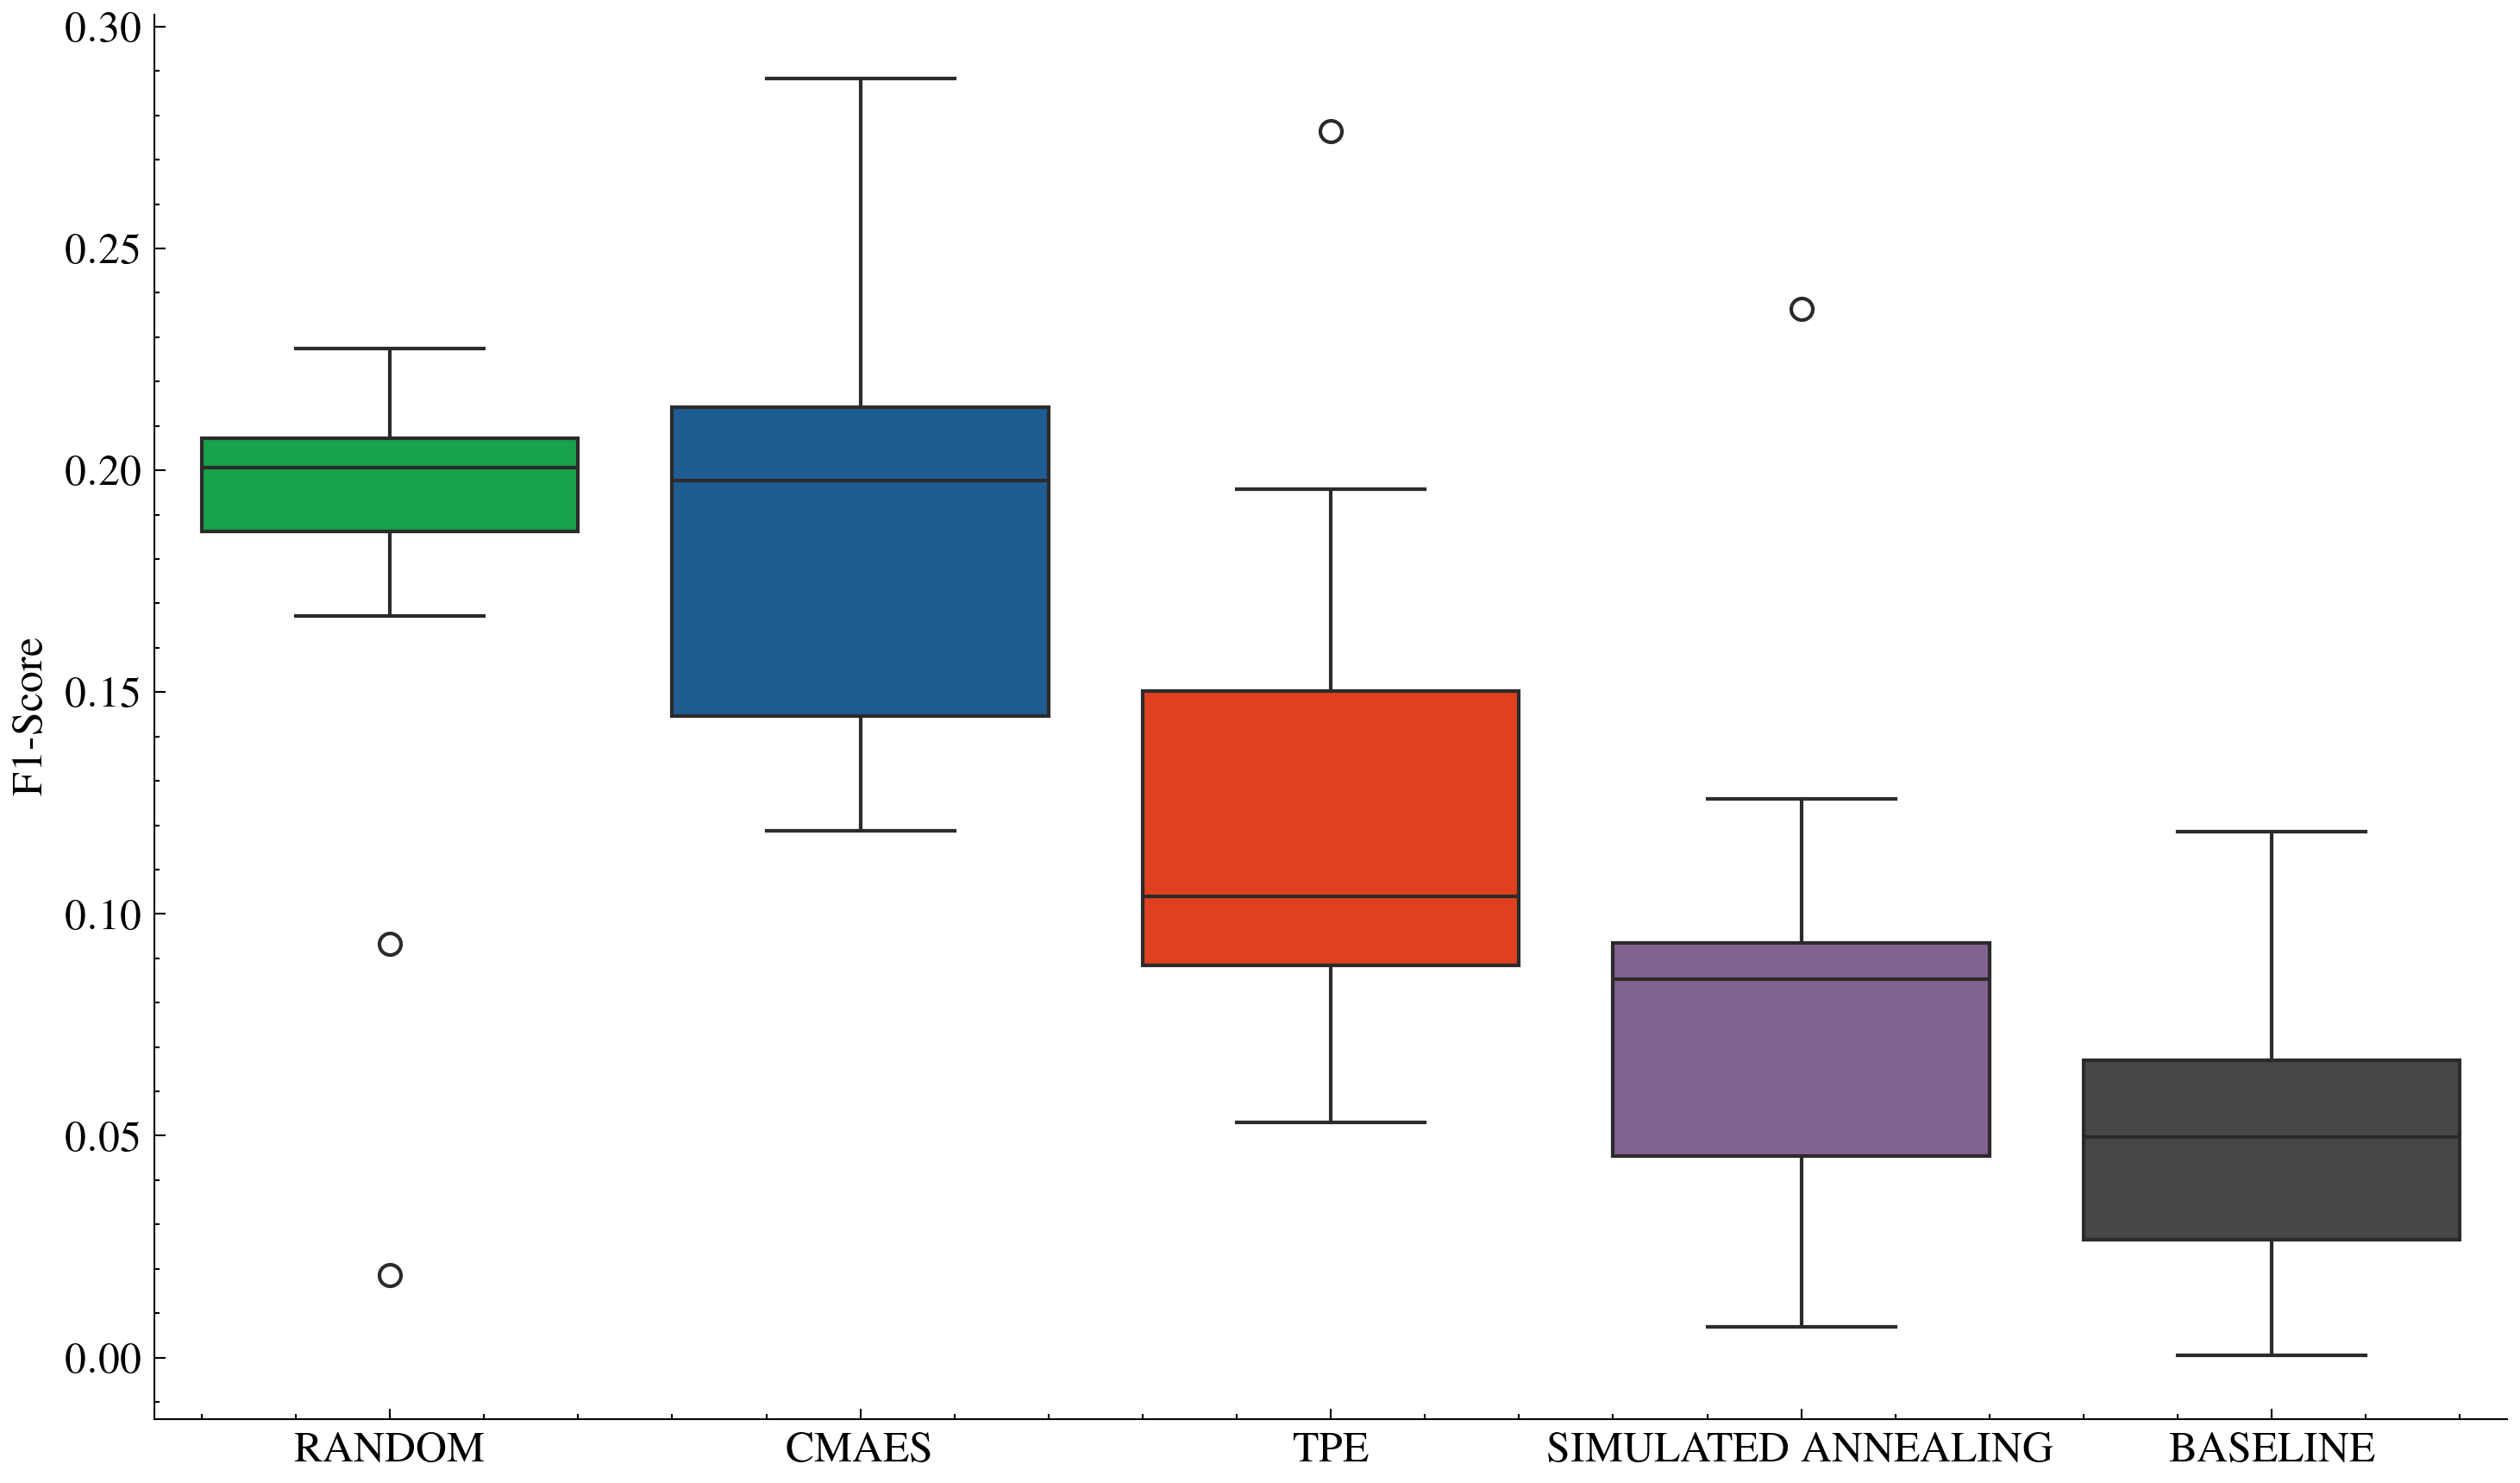

In [10]:
import seaborn as sns

def plot_boxplot_f1_scores(
    sampler_csv_paths: Dict[str, Dict[str, str]], 
    output_path: str, 
    output_format: str = "png",
):
    """
    Generate a boxplot comparing the F1-Scores per epoch for explored models.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file containing the F1-Score data.
            - "color": Color to plot for the sampler.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
    """
    f1_scores_data = []

    # Helper function to calculate F1-Score for a given CSV file
    def compute_f1_scores_per_epoch(results_file: str):
        df = pd.read_csv(results_file)
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        return f1_scores

    # Collect F1-Scores for all models and epochs
    for sampler_name, sampler_data in sampler_csv_paths.items():
        results_file = sampler_data["path"]
        if os.path.exists(results_file):
            f1_scores = compute_f1_scores_per_epoch(results_file)
            for epoch, f1 in enumerate(f1_scores):
                f1_scores_data.append({"Sampler": sampler_name.upper(), "Epoch": epoch + 1, "F1-Score": f1})

    # Convert collected data to DataFrame
    f1_df = pd.DataFrame(f1_scores_data)

    # Create the boxplot with axes object
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    sns.boxplot(
        ax=ax,
        data=f1_df, 
        x="Sampler", 
        y="F1-Score", 
        palette={k.upper(): v["color"] for k, v in sampler_csv_paths.items()}
    )
    ax.set_xlabel("")
    ax.set_ylabel("F1-Score")

    # Customize spines and ticks
    ax.spines[['right', 'top']].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches="tight")
    plt.show()
    
plot_boxplot_f1_scores(
    sampler_csv_paths=results_csv_paths,
    output_path=os.path.join(save_plots_path, "bbox_f1_comparison"),
    output_format="svg"
)


In [12]:
import os

def plot_performance_with_custom_legend_and_labels(performance_data, colors, output_path, output_format):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    splits = ["train", "val", "test"]
    bar_width = 0.2  # Width of individual bars
    sorted_labels = ["p100", "p99", "p90_98", "p70_90", "p50_70"]  # Custom label order
    
    # Custom label mappings for x-axis
    label_mapping = {
        "p50_70": r"$[50, 70)\%$",
        "p70_90": r"$[70, 90)\%$",
        "p90_98": r"$[90, 98)\%$",
        "p99": r"$99\%$",
        "p100": r"$100\%$"
    }
    
    all_handles = []  # To store legend handles
    
    for i, split in enumerate(splits):
        ax = axes[i]
        results = []

        # Aggregate F1-Score for each model
        for model, df in performance_data.items():
            filtered_df = df[df["Label"] != "nolesion"]  # Exclude "nolesion"
            for label in sorted_labels:
                if label in filtered_df["Label"].values:
                    precision = filtered_df.loc[filtered_df["Label"] == label, f"{split}/precision"].mean()
                    recall = filtered_df.loc[filtered_df["Label"] == label, f"{split}/recall"].mean()
                    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
                else:
                    f1_score = 0  # If label is missing, assign 0
                results.append((split, model, label, f1_score))

        # Organize results into a DataFrame
        results_df = pd.DataFrame(results, columns=["Split", "Model", "Label", "F1_Score"])

        # Compute X positions for bars
        x_base = range(len(sorted_labels))
        for idx, (model, color) in enumerate(colors.items()):
            model_data = results_df[(results_df["Model"] == model) & (results_df["Split"] == split)]
            f1_scores = [model_data.loc[model_data["Label"] == label, "F1_Score"].values[0] 
                         for label in sorted_labels]
            x_positions = [x + idx * bar_width for x in x_base]
            
            bars = ax.bar(
                x_positions, 
                f1_scores, 
                width=bar_width, 
                label=model if i == 0 else "",  # Add label only for the first plot
                color=color, 
                alpha=0.7
            )
            
            if i == 0:  # Collect legend handles for the first plot only
                all_handles.append(bars[0])

        # Configure the subplot
        ax.set_title(f"Split: {split}")
        ax.set_xlabel("Labels")
        ax.set_xticks([x + (bar_width * (len(colors)-1) / 2) for x in x_base])
        ax.set_xticklabels([label_mapping[label] for label in sorted_labels], rotation=0, ha="right")

    idx = 0
    for ax in axes:
        ax.spines[['right', 'top']].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        
        if idx == 0: text = "a."
        elif idx == 1: text = "b."
        else: text = "c."
        
        if idx == 0: ax.set_ylabel("F1-Score")

        ax.text(-0.05, 1.05, text, transform=ax.transAxes, fontsize=12, fontweight='bold',
                va='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
        idx += 1

    # Unified legend outside the plot
    fig.legend(handles=all_handles, labels=colors.keys(), loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.015))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Adjust bottom spacing to fit legend
    plt.savefig(f"{output_path}.{output_format}", format=output_format, bbox_inches="tight")
    plt.show()

path_to_results_csv = "/home/mario/Python/Results/Coronariografias/patient-based/"

performance_csv_paths = {
    "TPE": {"path": os.path.join(path_to_results_csv, "test_label_model_TPE.csv"), "color": colors.get("TPE")},
    "CMAES": {"path": os.path.join(path_to_results_csv, "test_label_model_CMAES.csv"), "color": colors.get("CMAES")},
    "RANDOM": {"path": os.path.join(path_to_results_csv, "test_label_model_RANDOM.csv"), "color": colors.get("RANDOM")},
    "BASELINE": {"path": os.path.join(path_to_results_csv, "test_label_model_BASELINE.csv"), "color": colors.get("BASELINE")},
    "SIMULATED ANNEALING": {"path": os.path.join(path_to_results_csv, "test_label_model_SIMULATED_ANNEALING.csv"), "color": colors.get("SIMULATED")},
}

# Load CSV files into DataFrames
data = {}
for model, details in performance_csv_paths.items():
    data[model] = pd.read_csv(details["path"])

#save_plots_path = "/home/mario/Python/Results/Coronariografias/patient-based/Plots/"
# Call the updated function
plot_performance_with_custom_legend_and_labels(data, {k: v["color"] for k, v in performance_csv_paths.items()}, output_path=os.path.join(save_plots_path, "test_per_labels"), output_format="pdf")


FileNotFoundError: [Errno 2] No such file or directory: '/home/mario/Python/Results/Coronariografias/patient-based/test_label_model_TPE.csv'

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def plot_combined_heatmap(root_folder, output_file, selected_internal_fold):
    """
    Plots a combined heatmap for patient distributions across outer folds and a specified internal fold.

    Args:
        root_folder (str): Root folder containing the double cross-validation splits.
        output_file (str): Path to save the combined heatmap as an SVG file.
        selected_internal_fold (str): Name of the internal fold to include (e.g., "internal_fold_1").
    """
    outer_folds = sorted(Path(root_folder).glob("fold_*"))
    patient_fold_data = []

    # Collect data for each outer fold
    for outer_fold in outer_folds:
        fold_name = outer_fold.name
        test_csv = outer_fold / "test.csv"
        internal_folds_path = outer_fold / "internal_folds" / selected_internal_fold

        if not test_csv.exists() or not internal_folds_path.exists():
            continue

        # Load test and train patients
        test_df = pd.read_csv(test_csv)
        train_csv = internal_folds_path / "train.csv"

        if not train_csv.exists():
            continue

        train_df = pd.read_csv(train_csv)
        test_patients = set(test_df["Patient"])
        train_patients = set(train_df["Patient"])

        # Collect all patients and their split type
        all_patients = sorted(train_patients | test_patients)
        fold_data = ["train" if patient in train_patients else "test" for patient in all_patients]
        patient_fold_data.append((fold_name, all_patients, fold_data))

    # Create a heatmap matrix
    all_unique_patients = sorted({patient for _, patients, _ in patient_fold_data for patient in patients})
    heatmap_matrix = []

    for fold_name, all_patients, fold_data in patient_fold_data:
        row = []
        for patient in all_unique_patients:
            if patient in all_patients:
                row.append("train" if fold_data[all_patients.index(patient)] == "train" else "test")
            else:
                row.append("none")
        heatmap_matrix.append(row)

    # Convert to DataFrame for plotting
    heatmap_df = pd.DataFrame(
        heatmap_matrix,
        index=[fold_name for fold_name, _, _ in patient_fold_data],
        columns=all_unique_patients
    )

    # Map values for colors
    color_map = {"train": 1, "test": 2, "none": 0}
    heatmap_df = heatmap_df.replace(color_map)

    # Plot heatmap
    plt.figure(figsize=(15, len(patient_fold_data) * 2))
    sns.heatmap(
        heatmap_df,
        cmap=sns.color_palette(["blue", "blue", "green"], as_cmap=True),
        cbar=False,
        linewidths=0.5,
        linecolor="black",
        xticklabels=True,
        yticklabels=True,
    )

    plt.title(f"Patient Distribution Across Outer Folds for {selected_internal_fold}", fontsize=16)
    plt.xlabel("Patients", fontsize=12)
    plt.ylabel("Outer Folds", fontsize=12)
    plt.tight_layout()

    # Save the heatmap
    plt.savefig(output_file, format="svg")
    plt.close()

# Define parameters
root_folder = "/home/mario/Python/Datasets/CADICA_Project/double_cv_splits"
output_file = "/home/mario/Python/Datasets/CADICA_Project/double_cv_splits/combined_heatmap.svg"
selected_internal_fold = "internal_fold_1"

# Generate and save the combined heatmap
plot_combined_heatmap(root_folder, output_file, selected_internal_fold)
output_file


/tmp/ipykernel_9357/2231959581.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.replace(color_map)


'/home/mario/Python/Datasets/CADICA_Project/double_cv_splits/combined_heatmap.svg'

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'ieee', 'std-colors'])
plt.rcParams['font.size'] = 12
plt.rcParams.update({'figure.dpi': '300'})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

def compute_f1_score(precision: float, recall: float) -> float:
    """
    Computes the F1-Score from precision and recall.
    """
    return (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def aggregate_fold_data(root_folder: str) -> pd.DataFrame:
    """
    Aggregates test metrics and label-specific metrics across models and folds.

    Args:
        root_folder: Root directory containing fold subfolders.

    Returns:
        A DataFrame containing aggregated data with these columns:
            ['Model', 'Fold', 'Overall_F1', 'Overall_mAP50', 'Overall_mAP50-95', 
             'Labels'] 
        where 'Labels' is a dictionary:
            { label_name: (F1, mAP50, mAP50-95) }
        Missing labels per fold are stored as np.nan in that label's tuple.
    """
    records = []
    
    for fold_folder in os.listdir(root_folder):
        fold_path = os.path.join(root_folder, fold_folder)
        if not os.path.isdir(fold_path):
            continue
        
        metrics_file = os.path.join(fold_path, f"{fold_folder}_validation_metrics.csv")
        label_metrics_file = os.path.join(fold_path, f"{fold_folder}_label_validation_results.csv")
        if not (os.path.exists(metrics_file) and os.path.exists(label_metrics_file)):
            print(f"[WARNING] Metrics files missing for {fold_path}. Skipping this folder.")
            continue
        
        # Extract model name (e.g., "RANDOM" from "RANDOM_outer_1_inner_1")
        model_name = fold_folder.split("_outer")[0]
        # Extract outer fold number
        parts = fold_folder.split("_")
        fold_number = parts[2] if len(parts) > 2 else "?"

        overall_df = pd.read_csv(metrics_file)
        label_df = pd.read_csv(label_metrics_file)

        # Filter out 'nolesion' and compute F1
        label_df = label_df[label_df['Label'] != 'nolesion'].copy()
        label_df['F1'] = label_df.apply(
            lambda row: compute_f1_score(row['test/precision'], row['test/recall']), axis=1
        )

        # Compute overall F1
        overall_f1 = compute_f1_score(
            overall_df['test/precision'].iloc[0],
            overall_df['test/recall'].iloc[0]
        )
        overall_map50 = overall_df['test/mAP50'].iloc[0]
        overall_map5095 = overall_df['test/mAP50-95'].iloc[0]

        label_dict = {}
        for _, row in label_df.iterrows():
            label_name = row['Label']
            f1_val = row['F1']
            map50_val = row['test/mAP50']
            map5095_val = row['test/mAP50-95']
            label_dict[label_name] = (f1_val, map50_val, map5095_val)
        
        records.append({
            'Model': model_name,
            'Fold': fold_number,
            'Overall_F1': overall_f1,
            'Overall_mAP50': overall_map50,
            'Overall_mAP50-95': overall_map5095,
            'Labels': label_dict
        })

    df = pd.DataFrame(records)
    return df

def generate_boxplot(df: pd.DataFrame, output_path: str):
    """
    Generates a boxplot for overall and label-specific F1-scores across models,
    using a predefined label and model order. Uses subplots() to allow customizing
    axis spines and ticks.
    
    Args:
        df: DataFrame from aggregate_fold_data().
        output_path: Path to save the boxplot image.
    """
    import matplotlib.patches as mpatches

    # Desired model order
    model_order = ["TPE", "GPSAMPLER", "RANDOM", "SIMULATED_ANNEALING", "BASELINE"]
    # Color mapping
    colors = {
        "RANDOM": "#994455",
        "TPE": "#6699CC",
        "GPSAMPLER": "#997700",
        "QMCSAMPLER": "#EE99AA",  # If you ever have QMCSAMPLER
        "SIMULATED_ANNEALING": "#004488",
        "BASELINE": "#000000",
    }

    # Desired label order (including Overall)
    label_order = ["Overall", "p100", "p99", "p90_98", "p70_90", "p50_70"]
    label_mapping = {
        "p50_70": r"$[50, 70)\%$",
        "p70_90": r"$[70, 90)\%$",
        "p90_98": r"$[90, 98)\%$",
        "p99": r"$99\%$",
        "p100": r"$100\%$"
    }

    # Build an internal structure for plotting: { label -> { model -> [F1 across folds] } }
    f1_scores = { label: {m: [] for m in model_order} for label in label_order }

    for _, row in df.iterrows():
        model = row['Model']
        if model not in model_order:
            continue
        # Overall
        f1_scores["Overall"][model].append(row['Overall_F1'])
        # Label-specific
        labels_dict = row['Labels']
        for label in labels_dict:
            if label in label_order:  # Only gather if label is recognized in our order
                f1_scores[label][model].append(labels_dict[label][0])  # the F1 is index 0

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))

    positions = []
    data_to_plot = []
    color_patches = []

    offset = 0.15
    xtick_labels = []

    # We'll iterate over label_order and create multiple sub-positions for each model
    for label_idx, label in enumerate(label_order):
        num_models = len(model_order)
        # center position for this label
        mid_position = label_idx
        start_position = mid_position - (offset * (num_models - 1) / 2.0)

        for m_idx, model in enumerate(model_order):
            all_values = f1_scores[label][model]
            positions.append(start_position + m_idx * offset)
            data_to_plot.append(all_values)
            color_patches.append(colors.get(model, "#000000"))

        xtick_labels.append(label)

    bplot = ax.boxplot(
        data_to_plot, 
        positions=positions, 
        patch_artist=True, 
        widths=offset * 0.8,
        medianprops=dict(color="black")
    )

    for patch, c in zip(bplot['boxes'], color_patches):
        patch.set_facecolor(c)

    # X-ticks
    ax.set_xticks(range(len(label_order)))
    ax.set_xticklabels([label_mapping.get(lbl, lbl) for lbl in label_order], rotation=0)

    ax.set_title("F1-Score Across Models and Labels")
    ax.set_xlabel("Labels (including Overall)")
    ax.set_ylabel("F1-Score")

    # Hide top/right spines and set bottom/left ticks
    ax.spines[['right', 'top']].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Draw horizontal grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Create legend
    legend_handles = []
    for model in model_order:
        if model in colors:
            patch = mpatches.Patch(color=colors[model], label=model)
            legend_handles.append(patch)
    # Place legend outside the lower center
    ax.legend(
        handles=legend_handles, 
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.08),
        ncol=len(model_order),
        frameon=False
    )

    fig.tight_layout()
    # Use bbox_inches="tight" so the legend is included
    fig.savefig(output_path, bbox_inches="tight")
    plt.close(fig)
    print(f"[INFO] Boxplot saved at {output_path}")


def generate_latex_table(df: pd.DataFrame, output_tex_path: str):
    """
    Generates a LaTeX table summarizing mean and std of F1, mAP50, mAP50-95
    for each label (including Overall) and each model, in a specific model order.
    No bold highlights.

    Args:
        df: DataFrame from aggregate_fold_data().
        output_tex_path: Path to the .tex file to write.
    """
    # Desired model order
    model_order = ["TPE", "GPSAMPLER", "RANDOM", "SIMULATED_ANNEALING", "BASELINE"]
    # Desired label order, plus mapping
    label_order = ["Overall", "p100", "p99", "p90_98", "p70_90", "p50_70"]
    label_mapping = {
        "p50_70": r"$[50, 70)\%$",
        "p70_90": r"$[70, 90)\%$",
        "p90_98": r"$[90, 98)\%$",
        "p99": r"$99\%$",
        "p100": r"$100\%$"
    }

    # Collect all (F1, mAP50, mAP50-95) values
    # metrics_dict[label][model] = [(f1, map50, map50-95), ... per fold]
    metrics_dict = {
        label: {m: [] for m in model_order} for label in label_order
    }

    for _, row in df.iterrows():
        model = row['Model']
        if model not in model_order:
            continue

        # Overall
        metrics_dict["Overall"][model].append(
            (row['Overall_F1'], row['Overall_mAP50'], row['Overall_mAP50-95'])
        )

        # Labels
        labels_dict = row['Labels']
        for label in labels_dict:
            if label in label_order:
                metrics_dict[label][model].append(labels_dict[label])

    # Build the final rows
    # For each label and model, compute mean ± std
    table_rows = {label: [] for label in label_order}

    for label in label_order:
        for model in model_order:
            data_list = metrics_dict[label][model]
            if len(data_list) == 0:
                # No data
                f1_str = "N/A"
                map50_str = "N/A"
                map5095_str = "N/A"
            else:
                arr = np.array(data_list, dtype=np.float32)
                mean_vals = np.nanmean(arr, axis=0)
                std_vals = np.nanstd(arr, axis=0)
                mean_f1, mean_mAP50, mean_mAP5095 = mean_vals
                std_f1, std_mAP50, std_mAP5095 = std_vals

                if np.isnan(mean_f1):
                    f1_str = "N/A"
                else:
                    f1_str = f"{mean_f1:.3f} ± {std_f1:.3f}"

                if np.isnan(mean_mAP50):
                    map50_str = "N/A"
                else:
                    map50_str = f"{mean_mAP50:.3f} ± {std_mAP50:.3f}"

                if np.isnan(mean_mAP5095):
                    map5095_str = "N/A"
                else:
                    map5095_str = f"{mean_mAP5095:.3f} ± {std_mAP5095:.3f}"

            table_rows[label].append({
                "Metric": label,
                "Model": model,
                "F1": f1_str,
                "mAP50": map50_str,
                "mAP50-95": map5095_str
            })

    # Generate LaTeX code
    latex_lines = []
    latex_lines.append(r"\begin{table}[h!]")
    latex_lines.append(r"\centering")
    latex_lines.append(r"\begin{tabular}{l l c c c}")
    latex_lines.append(r"\hline")
    latex_lines.append(r"Metric & Model & F1-Score & mAP50 & mAP50-95 \\")
    latex_lines.append(r"\hline")

    for label in label_order:
        rows_for_label = table_rows[label]
        # Remove models that truly have no entry if you prefer, 
        # but here we'll keep them all in the specified order.
        # The first row will contain the label, subsequent ones are blank in that column.
        if all((r["F1"] == "N/A" and r["mAP50"] == "N/A" and r["mAP50-95"] == "N/A") for r in rows_for_label):
            # means no data at all for that label
            continue

        # We'll map the label if possible
        label_display = label_mapping.get(label, label)

        first_row = rows_for_label[0]
        latex_lines.append(
            f"{label_display} & {first_row['Model']} & {first_row['F1']} & {first_row['mAP50']} & {first_row['mAP50-95']} \\\\"
        )
        for row in rows_for_label[1:]:
            latex_lines.append(
                f" & {row['Model']} & {row['F1']} & {row['mAP50']} & {row['mAP50-95']} \\\\"
            )
        latex_lines.append(r"\hline")

    latex_lines.append(r"\end{tabular}")
    latex_lines.append(r"\caption{Performance metrics (mean $\pm$ std) across models and labels.}")
    latex_lines.append(r"\label{tab:performance_metrics}")
    latex_lines.append(r"\end{table}")

    with open(output_tex_path, "w") as f:
        f.write("\n".join(latex_lines))
    print(f"[INFO] LaTeX table saved at {output_tex_path}")

# Example usage (remove or comment out if unneeded):
if __name__ == "__main__":
    root_folder = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/CV"
    output_boxplot = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/PLOTS/boxplot_f1_scores.svg"
    output_tex = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/PLOTS/performance_table.tex"

    aggregated_df = aggregate_fold_data(root_folder)
    generate_boxplot(aggregated_df, output_boxplot)
    generate_latex_table(aggregated_df, output_tex)


[INFO] Boxplot saved at /home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/PLOTS/boxplot_f1_scores.svg
[INFO] LaTeX table saved at /home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/PLOTS/performance_table.tex


## Tables

In [18]:
def generate_latex_tables_with_f1_from_csvs(performance_csv_paths, caption_base, label_base):
    """
    Generate LaTeX tables with horizontal label separators and best F1-Score highlighted,
    using CSV paths as input. Calculates F1-Score dynamically.

    Args:
        performance_csv_paths (dict): Dictionary with model names and paths to their CSV files.
        caption_base (str): Base string for captions.
        label_base (str): Base string for LaTeX labels.

    Returns:
        dict: Dictionary with split names as keys and LaTeX table strings as values.
    """
    # Fixed label mapping and splits
    label_mapping = {
        "p50_70": r"$[50, 70)\%$",
        "p70_90": r"$[70, 90)\%$",
        "p90_98": r"$[90, 98)\%$",
        "p99": r"$99\%$",
        "p100": r"$100\%$"
    }
    splits = ["train", "val", "test"]
    sorted_labels = ["p100", "p99", "p90_98", "p70_90", "p50_70"]

    # Load CSV files into a single DataFrame with F1-Score calculated
    combined_df = []
    for model, details in performance_csv_paths.items():
        df = pd.read_csv(details["path"])
        for split in splits:
            split_df = df.copy()
            split_df["Model"] = model
            split_df["Split"] = split

            # Dynamically compute F1-Score
            split_df["F1-Score"] = (2 * split_df[f"{split}/precision"] * split_df[f"{split}/recall"]) / (
                split_df[f"{split}/precision"] + split_df[f"{split}/recall"])
            split_df["F1-Score"].fillna(0, inplace=True)  # Handle division by zero

            combined_df.append(split_df)
    combined_df = pd.concat(combined_df, ignore_index=True)

    # Prepare LaTeX tables
    split_tables = {}
    for split in splits:
        current_df = combined_df[combined_df["Split"] == split]
        current_df = current_df.sort_values(by=["Label", "F1-Score"], ascending=[True, False])

        latex_table = f"\\begin{{table}}[ht]\n"
        latex_table += "\\centering\n"
        latex_table += f"\\caption{{{caption_base} ({split.capitalize()} split)}}\n"
        latex_table += f"\\label{{{label_base}_{split}}}\n"
        latex_table += "\\begin{tabularx}{\\textwidth}{>{\\raggedright\\arraybackslash}X>{\\raggedright\\arraybackslash}X>{\\centering\\arraybackslash}X>{\\centering\\arraybackslash}X>{\\centering\\arraybackslash}X}\n"
        latex_table += "\\toprule\n"
        latex_table += " \\textbf{Label} & \\textbf{Model} & \\textbf{Precision} & \\textbf{Recall} & \\textbf{F1-Score} \\\\\n"
        latex_table += "\\midrule\n"

        current_label = None
        for label in sorted_labels:
            label_rows = current_df[current_df["Label"] == label]
            if label_rows.empty:
                continue

            best_f1_score = label_rows["F1-Score"].max()

            for idx, (_, row) in enumerate(label_rows.iterrows()):
                label_cell = label_mapping.get(row["Label"], row["Label"]) if idx == 0 else ""
                f1_score_cell = f"\\textbf{{{row['F1-Score']:.3f}}}" if row["F1-Score"] == best_f1_score else f"{row['F1-Score']:.3f}"
                latex_table += f" {label_cell} & {row['Model']} & {row[f'{split}/precision']:.3f} & {row[f'{split}/recall']:.3f} & {f1_score_cell} \\\\\n"

            latex_table += "\\midrule\n"  # Horizontal bar to separate labels

        latex_table += "\\bottomrule\n"
        latex_table += "\\end{tabularx}\n"
        latex_table += "\\end{table}\n"
        split_tables[split] = latex_table

    return split_tables


# Generate tables with F1-Score dynamically calculated
latex_tables = generate_latex_tables_with_f1_from_csvs(
    performance_csv_paths, 
    caption_base="F1-Score Performance per Label and Model", 
    label_base="tab:performance_f1"
)

# Display LaTeX tables
for split, table in latex_tables.items():
    print(f"--- LaTeX Table for {split.capitalize()} Split ---\n")
    print(table)


--- LaTeX Table for Train Split ---

\begin{table}[ht]
\centering
\caption{F1-Score Performance per Label and Model (Train split)}
\label{tab:performance_f1_train}
\begin{tabularx}{\textwidth}{>{\raggedright\arraybackslash}X>{\raggedright\arraybackslash}X>{\centering\arraybackslash}X>{\centering\arraybackslash}X>{\centering\arraybackslash}X}
\toprule
 \textbf{Label} & \textbf{Model} & \textbf{Precision} & \textbf{Recall} & \textbf{F1-Score} \\
\midrule
 $100\%$ & RANDOM & 0.999 & 1.000 & \textbf{1.000} \\
  & CMAES & 0.998 & 1.000 & 0.999 \\
  & TPE & 0.981 & 0.969 & 0.975 \\
  & BASELINE & 0.700 & 0.547 & 0.614 \\
\midrule
 $99\%$ & RANDOM & 0.998 & 1.000 & \textbf{0.999} \\
  & CMAES & 0.985 & 0.966 & 0.976 \\
  & TPE & 0.925 & 0.882 & 0.903 \\
  & BASELINE & 0.642 & 0.765 & 0.698 \\
\midrule
 $[90, 98)\%$ & RANDOM & 0.995 & 0.995 & \textbf{0.995} \\
  & CMAES & 0.959 & 0.965 & 0.962 \\
  & TPE & 0.884 & 0.790 & 0.834 \\
  & BASELINE & 0.766 & 0.524 & 0.623 \\
\midrule
 $[70, 90)\%$ 

/tmp/ipykernel_10075/2429928695.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  split_df["F1-Score"].fillna(0, inplace=True)  # Handle division by zero
/tmp/ipykernel_10075/2429928695.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [50]:
def compute_validation_statistics(
    sampler_csv_paths: Dict[str, Dict[str, str]]
) -> pd.DataFrame:
    """
    Compute statistical validation data for F1-Scores, including max, mean, and standard deviation.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file containing the F1-Score data.

    Returns:
        pd.DataFrame: DataFrame containing max, mean, and standard deviation for each sampler.
    """
    stats_data = []

    # Helper function to calculate F1-Scores per epoch
    def compute_f1_scores(results_file: str):
        df = pd.read_csv(results_file)
        precision = df["metrics/precision(B)"]
        recall = df["metrics/recall(B)"]
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        return f1_scores

    # Process each sampler
    for sampler_name, sampler_data in sampler_csv_paths.items():
        results_file = sampler_data["path"]
        if os.path.exists(results_file):
            f1_scores = compute_f1_scores(results_file)
            stats_data.append({
                "Sampler": sampler_name.upper(),
                "Max F1": f1_scores.max(),
                "Mean F1": f1_scores.mean(),
                "Std F1": f1_scores.std()
            })

    # Convert collected statistics to DataFrame
    stats_df = pd.DataFrame(stats_data)
    return stats_df
stats_df = compute_validation_statistics(results_csv_paths)


def dataframe_to_latex(df: pd.DataFrame, caption: str, label: str) -> str:
    """
    Convert a DataFrame into a LaTeX table format.

    Parameters:
        df (pd.DataFrame): Input DataFrame to convert.
        caption (str): Caption for the LaTeX table.
        label (str): Label for referencing the table in LaTeX.

    Returns:
        str: LaTeX table as a string.
    """
    latex_table = f"\\begin{{table}}[ht]\n"
    latex_table += "\\centering\n"
    latex_table += f"\\caption{{{caption}}}\n"
    latex_table += f"\\label{{{label}}}\n"
    latex_table += "\\begin{tabularx}{\\columnwidth}{>{\\raggedright\\arraybackslash}X>{\\raggedright\\arraybackslash}X>{\\raggedright\\arraybackslash}X>{\\raggedright\\arraybackslash}X}\n"
    latex_table += "\\toprule\n"
    latex_table += " \\textbf{Sampler} & \\textbf{Max F1} & \\textbf{Mean F1} & \\textbf{Std F1} \\\\\n"
    latex_table += "\\midrule\n"

    # Iterate through the DataFrame rows and append each row
    for _, row in df.iterrows():
        latex_table += f" {row['Sampler']} & {row['Max F1']:.6f} & {row['Mean F1']:.6f} & {row['Std F1']:.6f} \\\\\n"

    latex_table += "\\bottomrule\n"
    latex_table += "\\end{tabularx}\n"
    latex_table += "\\end{table}\n"

    return latex_table

# Example Usage
latex_output = dataframe_to_latex(
    stats_df, 
    caption="Validation statistics for explored models (F1-Score).", 
    label="tab:validation_stats"
)

print(latex_output)


\begin{table}[ht]
\centering
\caption{Validation statistics for explored models (F1-Score).}
\label{tab:validation_stats}
\begin{tabularx}{\columnwidth}{>{\raggedright\arraybackslash}X>{\raggedright\arraybackslash}X>{\raggedright\arraybackslash}X>{\raggedright\arraybackslash}X}
\toprule
 \textbf{Sampler} & \textbf{Max F1} & \textbf{Mean F1} & \textbf{Std F1} \\
\midrule
 RANDOM & 0.227535 & 0.192319 & 0.035841 \\
 CMAES & 0.288313 & 0.187692 & 0.049852 \\
 TPE & 0.276377 & 0.124334 & 0.060470 \\
 BASELINE & 0.118540 & 0.048464 & 0.026639 \\
\bottomrule
\end{tabularx}
\end{table}



In [63]:
import yaml

def extract_best_hyperparameters(
    sampler_yaml_paths: Dict[str, Dict[str, str]],
    hyperparameters: List[str] = None
) -> pd.DataFrame:
    """
    Extract best hyperparameter values for each model from YAML configuration files.

    Parameters:
        sampler_yaml_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the YAML file containing hyperparameter configurations.
        hyperparameters (List[str], optional): List of hyperparameters to extract.

    Returns:
        pd.DataFrame: DataFrame containing hyperparameters and their values for each sampler.
    """
    if hyperparameters is None:
        hyperparameters = [
            "batch", "optimizer", "lr0", "lrf", "momentum", "weight_decay",
            "warmup_epochs", "warmup_momentum", "warmup_bias_lr", "box", "cls", "dfl"
        ]

    hyperparam_data = {"Hyperparameter": hyperparameters}

    for sampler_name, sampler_data in sampler_yaml_paths.items():
        yaml_path = sampler_data["path"]
        if os.path.exists(yaml_path):
            with open(yaml_path, "r") as file:
                config = yaml.safe_load(file)
            hyperparam_values = [config.get(param, "-") for param in hyperparameters]
            hyperparam_data[sampler_name.upper()] = hyperparam_values
        else:
            hyperparam_data[sampler_name.upper()] = ["-"] * len(hyperparameters)

    # Convert to DataFrame
    hyperparam_df = pd.DataFrame(hyperparam_data)
    return hyperparam_df

def dataframe_to_latex_hyperparams(df: pd.DataFrame, caption: str, label: str) -> str:
    """
    Convert a DataFrame of hyperparameters into a formatted LaTeX table.

    Parameters:
        df (pd.DataFrame): Input DataFrame to convert.
        caption (str): Caption for the LaTeX table.
        label (str): Label for referencing the table in LaTeX.

    Returns:
        str: LaTeX table as a string.
    """
    latex_table = f"\\begin{{table}}[ht]\n"
    latex_table += "\\centering\n"
    latex_table += f"\\caption{{{caption}}}\n"
    latex_table += f"\\label{{{label}}}\n"
    latex_table += "\\begin{tabularx}{\\textwidth}{l|c|c|c|c}\n"
    latex_table += "\\toprule\n"
    latex_table += " \\textbf{Hyperparameter} & \\textbf{CMAES} & \\textbf{TPE} & \\textbf{RANDOM} & \\textbf{BASELINE} \\\\\n"
    latex_table += "\\midrule\n"

    # Add rows for each hyperparameter
    for _, row in df.iterrows():
        row_data = [row[col] for col in df.columns]
        if type(row_data[1]) != str: latex_table += f" {row_data[0]} & {row_data[1]:.6f} & {row_data[2]:.6f} & {row_data[3]:.6f} & {row_data[4]:.6f} \\\\\n"
        else: latex_table += f" {row_data[0]} & {row_data[1]} & {row_data[2]} & {row_data[3]} & {row_data[4]} \\\\\n"
    
    latex_table += "\\bottomrule\n"
    latex_table += "\\end{tabularx}\n"
    latex_table += "\\end{table}\n"
    return latex_table



sampler_yaml_paths = {
    "RANDOM": {"path": os.path.join(base_path, "RandomSamplerBaseline", "detect", "trial_22_training", "args.yaml"), "color": colors.get("RANDOM")},
    "CMAES": {"path": os.path.join(base_path, "CMAES", "detect", "trial_131_training", "args.yaml"), "color": colors.get("CMAES")},
    "TPE": {"path": os.path.join(base_path, "TPE", "detect", "trial_121_training", "args.yaml"), "color": colors.get("TPE")},
    "BASELINE": {"path": os.path.join(base_path, "Baseline", "args.yaml"), "color": colors.get("BASELINE")},
}

hyperparam_df = extract_best_hyperparameters(sampler_yaml_paths)

latex_table = dataframe_to_latex_hyperparams(
    hyperparam_df, 
    caption="Best Hyperparameter Configurations for Each Model", 
    label="tab:hyperparams"
)

print(latex_table)


\begin{table}[ht]
\centering
\caption{Best Hyperparameter Configurations for Each Model}
\label{tab:hyperparams}
\begin{tabularx}{\textwidth}{l|c|c|c|c}
\toprule
 \textbf{Hyperparameter} & \textbf{CMAES} & \textbf{TPE} & \textbf{RANDOM} & \textbf{BASELINE} \\
\midrule
 batch & 32.000000 & 4.000000 & 4.000000 & 16.000000 \\
 optimizer & Adam & AdamW & AdamW & Adam \\
 lr0 & 0.000011 & 0.000051 & 0.000332 & 0.010000 \\
 lrf & 0.003390 & 0.000392 & 0.000021 & 0.010000 \\
 momentum & 0.740748 & 0.903277 & 0.714544 & 0.937000 \\
 weight_decay & 0.002324 & 0.000199 & 0.000061 & 0.000500 \\
 warmup_epochs & 7.000000 & 7.000000 & 7.000000 & 3.000000 \\
 warmup_momentum & 0.853676 & 0.933083 & 0.807755 & 0.800000 \\
 warmup_bias_lr & 0.100000 & 0.100000 & 0.100000 & 0.010000 \\
 box & 6.434313 & 7.276055 & 6.178432 & 7.500000 \\
 cls & 0.564209 & 0.719916 & 0.657537 & 0.500000 \\
 dfl & 1.918201 & 2.103288 & 1.198667 & 1.500000 \\
\bottomrule
\end{tabularx}
\end{table}



## Optuna debugging

In [25]:
import optuna 
def _save_results_to_csv(study: optuna.Study) -> None:
    """
    Saves the results of each trial, including hyperparameters and performance metrics, to a CSV file.

    Parameters
    ----------
    study : optuna.Study
        The Optuna study object that contains all the completed trial information.

    Description
    -----------
    This method uses the Optuna `trials_dataframe` method to convert the results of each trial
    into a pandas DataFrame. The DataFrame includes details such as the trial number, objective
    value, hyperparameters, trial state, and user-defined attributes. The results are then saved
    to a CSV file named 'hyperparameter_optimization_results.csv' for easy analysis and
    record-keeping.

    Notes
    -----
    - The CSV file is created in the current working directory.
    - The method logs a message indicating that the results have been saved successfully.
    """
    df: pd.DataFrame = study.trials_dataframe(attrs=('number', 'value', 'params', 'state', 'user_attrs'))
    df.to_csv('/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/QMCSAMPLER/hyperparameter_optimization_results.csv', index=False)


study = optuna.create_study(
    study_name="CADICA_TPE_Sampler_no_p02050_augment",
    direction="maximize",
    storage=optuna.storages.RDBStorage(
            url="sqlite:////home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/QMCSAMPLER/CADICA_BHO.db",
            engine_kwargs={"connect_args": {"timeout": 10}}
        ),
    load_if_exists=True,
)

_save_results_to_csv(study=study)


[I 2024-12-24 10:50:01,807] Using an existing study with name 'CADICA_TPE_Sampler_no_p02050_augment' instead of creating a new one.


In [23]:
import optuna


db_path = "sqlite:////home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/QMCSAMPLER/CADICA_BHO.db"  # Replace with the correct path to your .db file
study_name = "CADICA_TPE_Sampler_no_p02050_augment"       # Replace with your study name
study = optuna.load_study(study_name=study_name, storage=db_path)


for trial in study.trials:
    if trial.state != optuna.trial.TrialState.COMPLETE:
        print(f"Trial {trial.number}: State - {trial.state}")

study._storage.get_trial(32)

/home/mario/miniconda3/envs/cadica/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Trial 123: State - 3
Trial 124: State - 3
Trial 127: State - 3
Trial 128: State - 3
Trial 192: State - 0


FrozenTrial(number=31, state=TrialState.COMPLETE, values=[0.1418446733203625], datetime_start=datetime.datetime(2024, 12, 23, 14, 28, 39, 472858), datetime_complete=datetime.datetime(2024, 12, 23, 14, 38, 15, 634313), params={'optimizer': 'AdamW', 'batch': 8, 'lr0': 0.0008203912958630683, 'lrf': 6.678515546987446e-05, 'momentum': 0.7810193233191968, 'weight_decay': 0.0006037331031864224, 'warmup_epochs': 7, 'warmup_momentum': 0.9834473753813654, 'box': 7.755786642897874, 'cls': 0.7842390063218773, 'dfl': 2.790931642241776}, user_attrs={'batch_size': 8, 'execution_time': 574.4246695041656, 'f1_score': 0.1418446733203625, 'gpu_id': 2, 'last_epoch': 12, 'mAP50': 0.0850843626096584, 'mAP50-95': 0.02491777642380022, 'memory_allocated_after': 1183550976, 'memory_allocated_before': 278534656, 'memory_reserved_after': 2038431744, 'memory_reserved_before': 352321536, 'precision': 0.13605571292938168, 'recall': 0.14814814814814814, 'sampler': 'qmcsampler', 'seed': 791570}, system_attrs={}, inter

In [24]:
import sqlite3

# Path to your Optuna SQLite database file
db_path = "/home/mario/Python/Results/Coronariografias/patient_based_non_augmentation/QMCSAMPLER/CADICA_BHO.db"  # Replace with your database path

# Trial ID to fix
trial_id_to_fix = 193  # Replace with the bugged trial ID

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Check the current state of the trial
cursor.execute("SELECT state FROM trials WHERE trial_id = ?", (trial_id_to_fix,))
current_state = cursor.fetchone()
print(f"Trial {trial_id_to_fix} current state: {current_state}")

# Update the trial's state to COMPLETE (state = 2)
cursor.execute("UPDATE trials SET state = 'FAIL' WHERE trial_id = ?", (trial_id_to_fix,))
conn.commit()

# Verify the update
cursor.execute("SELECT state FROM trials WHERE trial_id = ?", (trial_id_to_fix,))
updated_state = cursor.fetchone()
print(f"Trial {trial_id_to_fix} new state: {updated_state}")

# Close the connection
conn.close()

Trial 193 current state: ('RUNNING',)
Trial 193 new state: ('FAIL',)


In [2]:
import pandas as pd
import plotly.express as px
from typing import Dict
from sklearn.preprocessing import LabelEncoder
import os

def plot_parallel_coordinates(
    sampler_csv_paths: Dict[str, Dict[str, str]],
    output_path: str,
    output_format: str = "png",
    metric_column: Dict[str, str] = {"F1-Score": "user_attrs_f1_score"}
):
    """
    Generate an interactive parallel coordinate plot using Plotly to visualize metrics and hyperparameters for hyperparameter optimization samplers.

    Parameters:
        sampler_csv_paths (Dict[str, Dict[str, str]]): Dictionary with sampler names as keys and dictionaries containing:
            - "path": Path to the CSV file.
            - "color": Colormap to plot for the sampler.
        output_path (str): Path to save the output figure.
        output_format (str): Format to save the figure (e.g., 'png', 'svg', 'pdf').
        metric_column (Dict[str, str]): Dictionary with display name as key and column name as value for the metric.
    """
    # Extract metric name and column
    metric_name, metric_col = list(metric_column.items())[0]

    # Define the order of hyperparameter axes
    axes_order = [
        metric_col, "params_batch", "params_box", "params_cls", "params_dfl", "params_lr0",
        "params_lrf", "params_momentum", "params_optimizer", "params_warmup_epochs",
        "params_warmup_momentum", "params_weight_decay", "user_attrs_last_epoch"
    ]

    # Process each sampler
    for sampler_name, sampler_data in sampler_csv_paths.items():
        # Load data
        df = pd.read_csv(sampler_data["path"])
        
        # Filter only the required columns
        df = df[axes_order].dropna()

        # Encode categorical variables (e.g., params_optimizer)
        if "params_optimizer" in df.columns:
            label_encoder = LabelEncoder()
            df["params_optimizer"] = label_encoder.fit_transform(df["params_optimizer"].astype(str))

        # Generate the parallel coordinates plot
        fig = px.parallel_coordinates(
            df, 
            color=metric_col,
            dimensions=axes_order,
            labels={col: col.replace("_", " ").title() for col in axes_order},
            color_continuous_scale=sampler_data["color"]
        )
        
        # Save the figure
        fig.write_image(f"{output_path}_{sampler_name}.{output_format}")
        fig.show()

# Example Usage
sampler_paths = {
    "random": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Blues"},
    "tpe": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Reds"},
    "cmaes": {"path": os.path.join(base_path, "RandomSamplerBaseline", base_name), "color": "Greens"}
}
plot_parallel_coordinates(sampler_paths, output_path="parallel_coordinates", output_format="png", metric_column={"F1-Score": "user_attrs_f1_score"})
